# NETW 1013 Clustering Project

**Objective:**
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers:
* Which clustering approach have you decided to use on each dataset?
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques?






Running this project requires the following imports:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *
# StandardScaler is a function to normalize the data
# You may also check MinMaxScaler and MaxAbsScaler
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



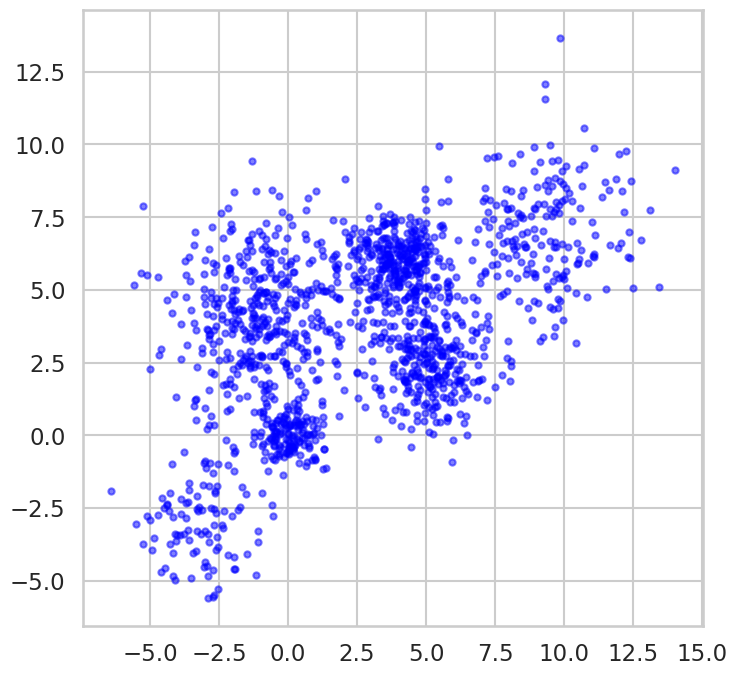

In [ ]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

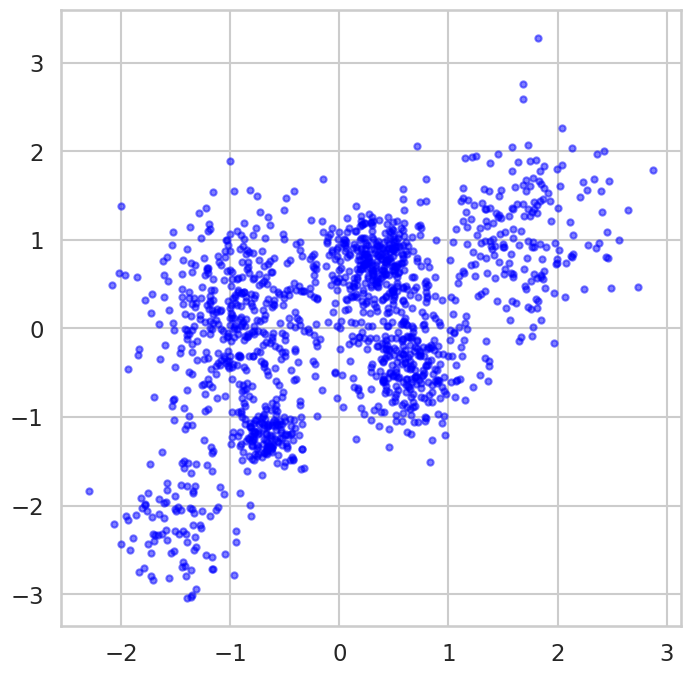

In [ ]:
# scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Multi = scaler.fit_transform(Multi_blob_Data)
display_cluster(scaled_Multi)


### Kmeans
* Use Kmeans with different values of K to cluster the above data.
* Display the outcome of each value of K.
* Plot distortion function versus K and choose the approriate value of K.
* Plot the silhouette_score versus K and use it to choose the best K.
* Store the silhouette_score for the best K for later comparison with other clustering techniques.
* Comment on the effect of centroid initialization on cluster assignment.
* Hint: Lookup k-means++ .

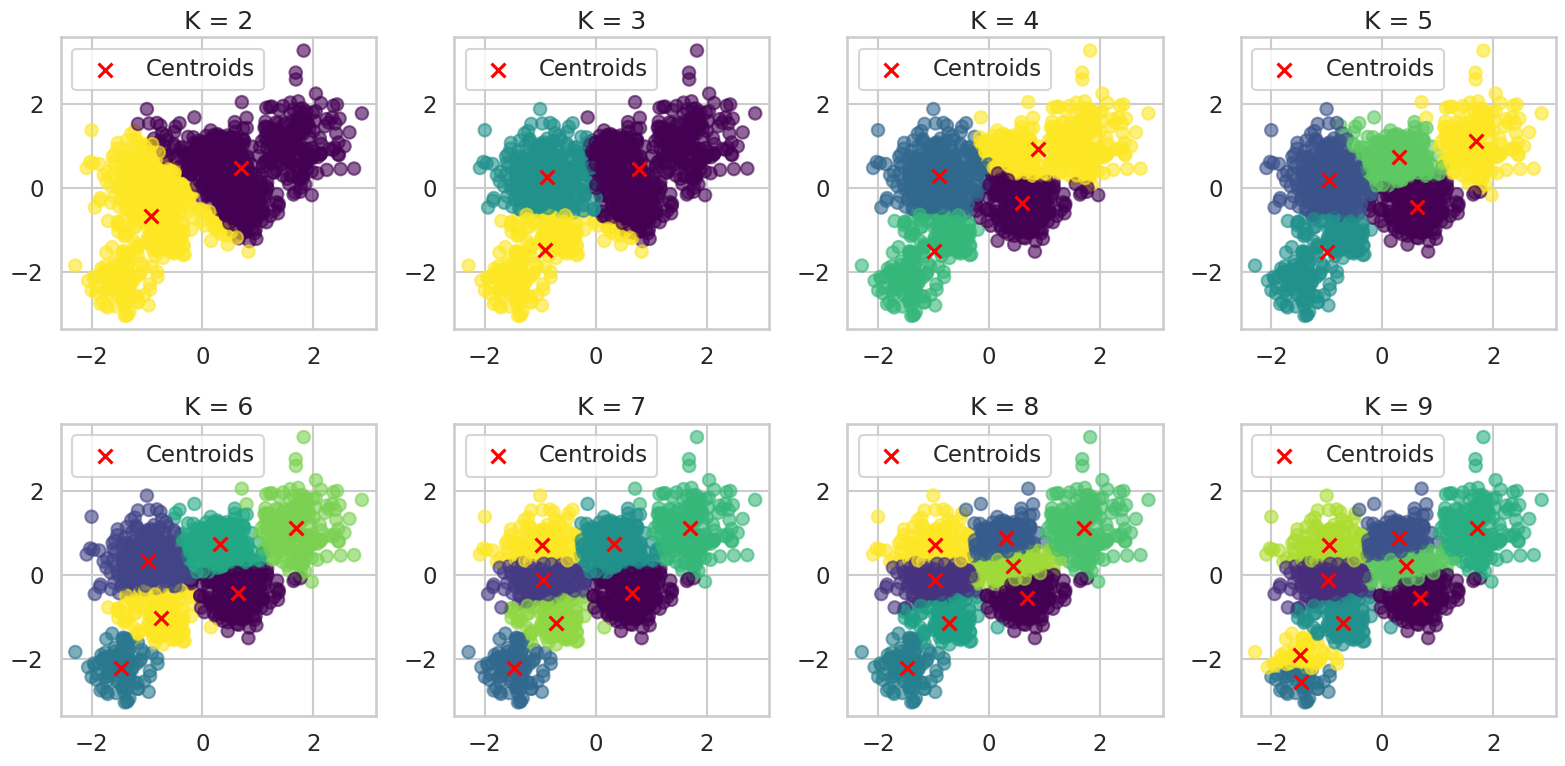

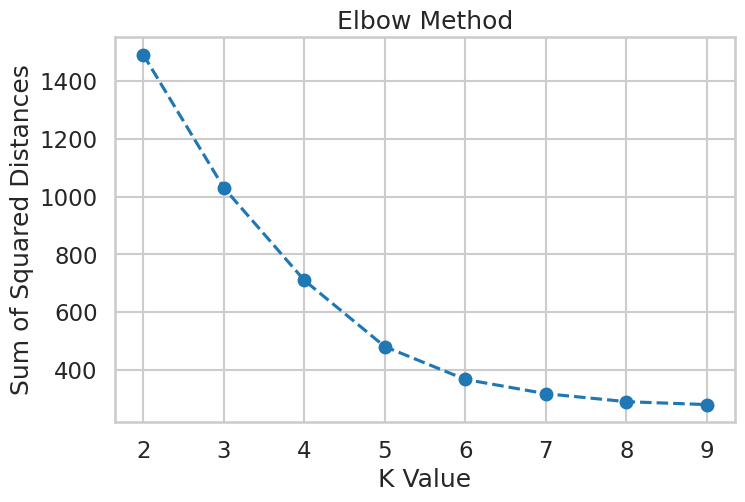

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Store SSD for elbow method
ssd = []

# Define number of clusters to test
k_values = range(2, 10)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust size and layout

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(scaled_Multi)  # Assign clusters

    ssd.append(model.inertia_)  # Store sum of squared distances

    # Plot clusters
    ax = axes[i // 4, i % 4]  # Adjust for subplots
    ax.scatter(scaled_Multi[:, 0], scaled_Multi[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    ax.set_title(f'K = {k}')
    ax.legend()

plt.tight_layout()
plt.show()

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()


In [ ]:
# There is an elbow at k=6, but it might not be very clear. A silhouette score will indicate better

Sil score for k=2: 0.4323
Sil score for k=3: 0.4119
Sil score for k=4: 0.4349
Sil score for k=5: 0.4843
Sil score for k=6: 0.4861
Sil score for k=7: 0.4706
Sil score for k=8: 0.4123
Sil score for k=9: 0.3974
Sil score for k=10: 0.3941


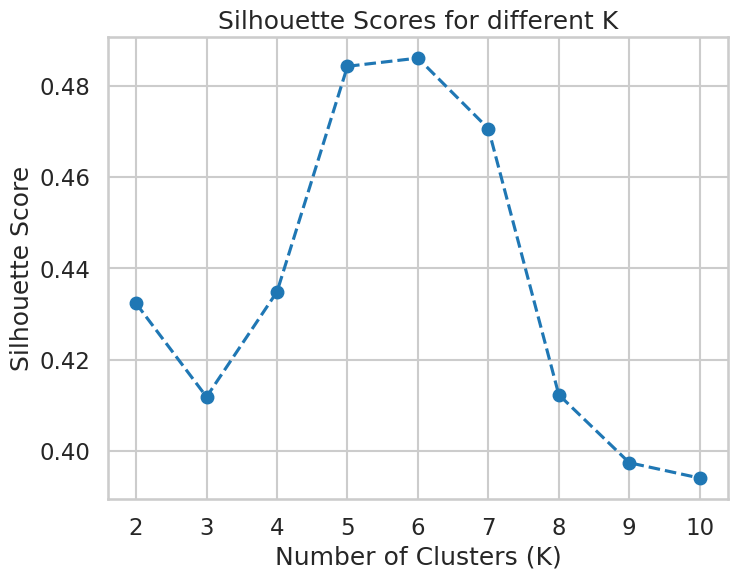

The optimal number of clusters (K) is: 6


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K_range = range(2, 11)  # Test values of K from 2 to 10

# Step 4: Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_Multi)
    labels = kmeans.labels_

    # Calculate silhouette score for the current K
    score = silhouette_score(scaled_Multi, labels)
    print(f"Sil score for k={k}: {score:.4f}")
    silhouette_scores.append(score)

# Step 5: Plot silhouette scores to visualize the best K
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 6: Find the optimal K (maximum silhouette score)
optimal_K1 = K_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (K) is: {optimal_K1}")

In [ ]:
# the silhoutte score test made it much more clearer that K=6 is the optimum number of clusters with a silhouette score 0.4861

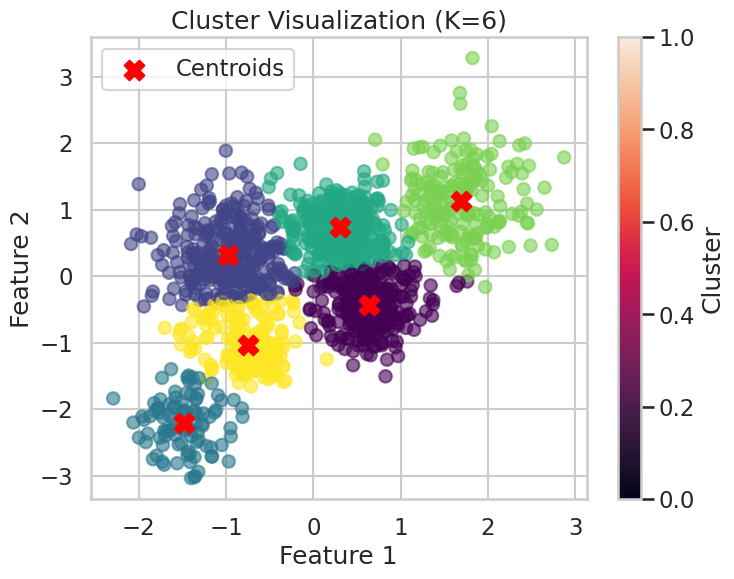

In [ ]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_K1, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_Multi)  # Get cluster assignments

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_Multi[:, 0], scaled_Multi[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')  # Plot centroids
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Cluster Visualization (K={optimal_K1})")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# K-Means++ is an improvement over standard K-Means that helps avoid poor cluster initialization.
# Instead of choosing cluster centers randomly, K-Means++ selects them in a smarter way to improve clustering performance.
# How K-Means++ Works :
# Pick the first centroid randomly from the dataset.
# For each remaining centroid:
#   Compute the distance of each data point to its nearest centroid.
#   Choose the next centroid with probability proportional to the squared distance (i.e., points far from existing centroids have a higher chance of being chosen).
# Repeat until all K centroids are initialized.
# This method spreads out initial centroids, improving clustering accuracy and stability.


# k-means++ is defualt in python
#  kmeans = KMeans(n_clusters=optimal_K, init='k-means++', random_state=42)
# init is by defualt k-means++ , even if not written

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques.
* Record your observation.

Silhouette Score for affinity=euclidean, linkage=average, distance_threshold=2: 0.3622226549861079


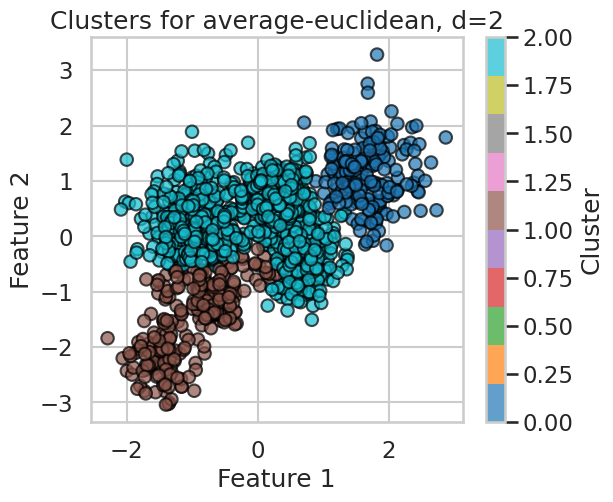

Silhouette Score for affinity=euclidean, linkage=complete, distance_threshold=2: 0.39493608021759763


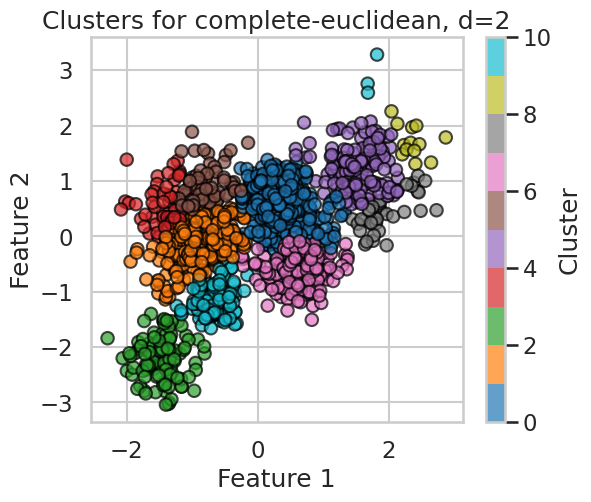

Silhouette Score for affinity=euclidean, linkage=complete, distance_threshold=5: 0.36736567022241734


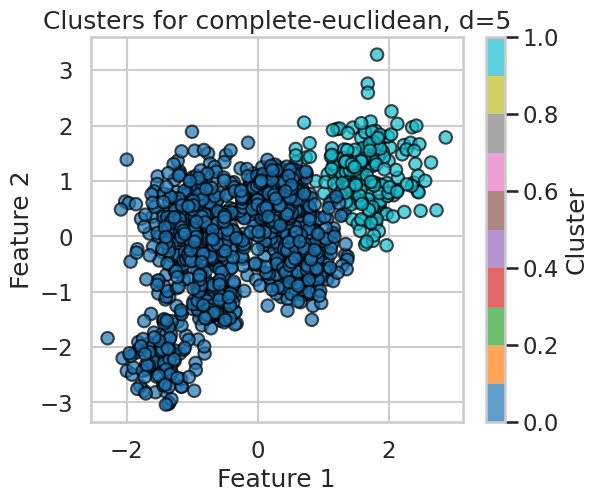

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=2: 0.2932048099558007


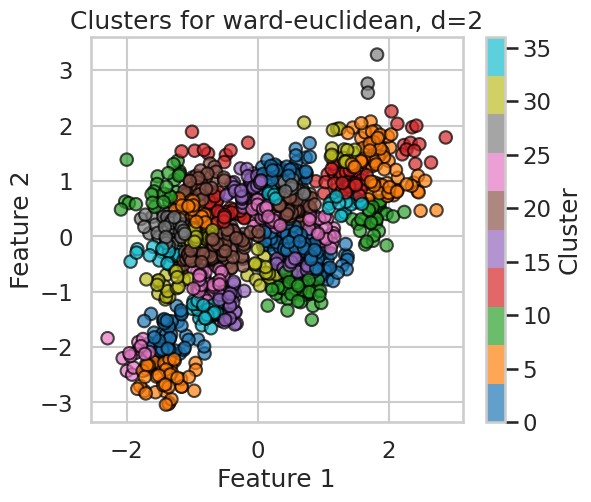

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=5: 0.33359511221490185


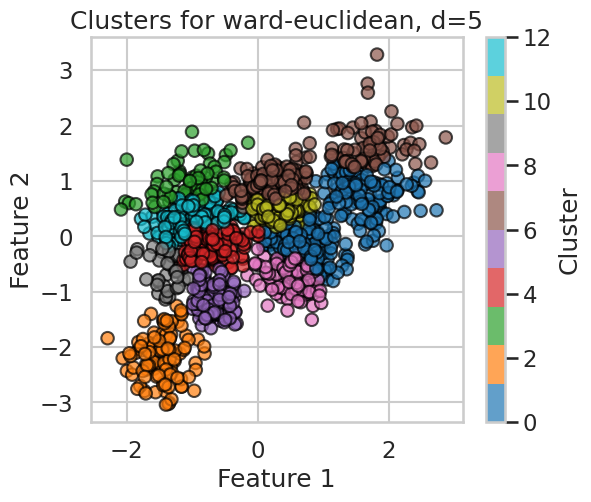

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=10: 0.4548664117944667


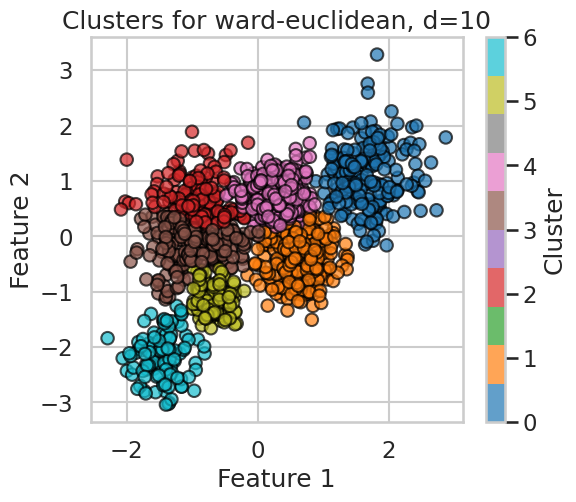

Silhouette Score for affinity=manhattan, linkage=average, distance_threshold=2: 0.41206890339331737


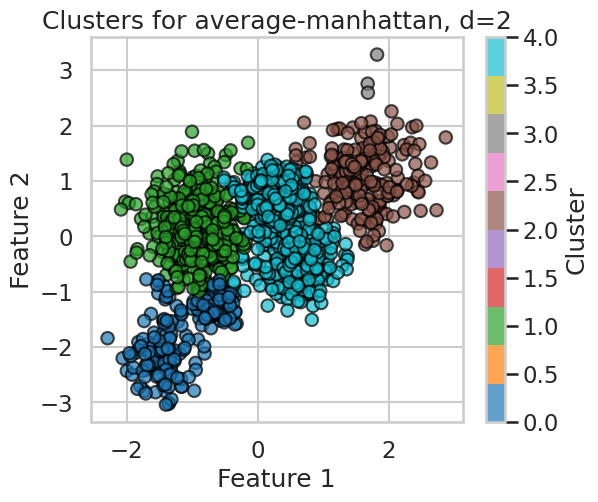

Silhouette Score for affinity=manhattan, linkage=complete, distance_threshold=2: 0.27880184246411144


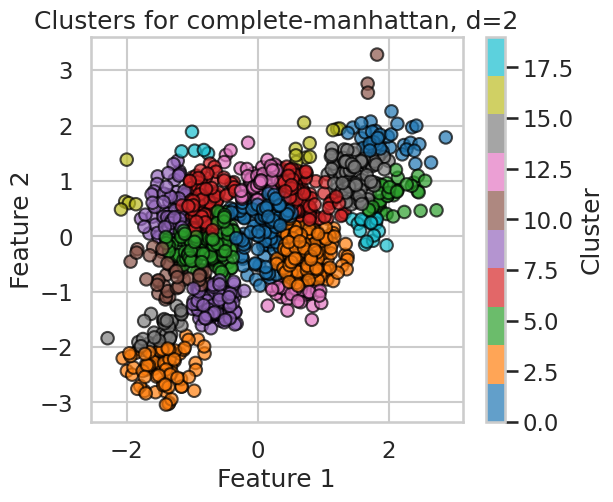

Silhouette Score for affinity=manhattan, linkage=complete, distance_threshold=5: 0.2673867875199795


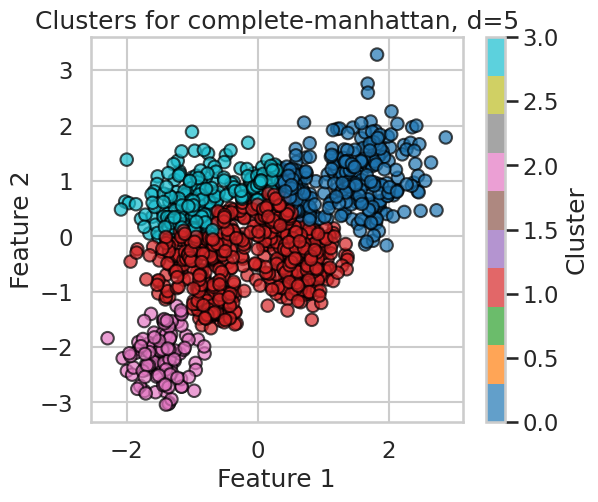


Best Agglomerative Clustering configuration:
{'affinity': 'euclidean', 'linkage': 'ward', 'distance_threshold': 10, 'silhouette_score': 0.4548664117944667}


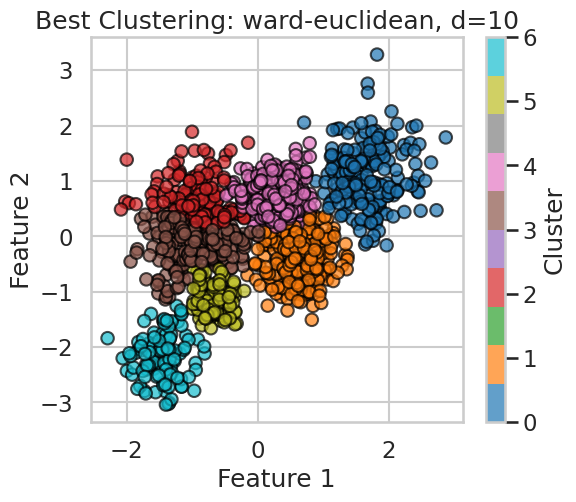

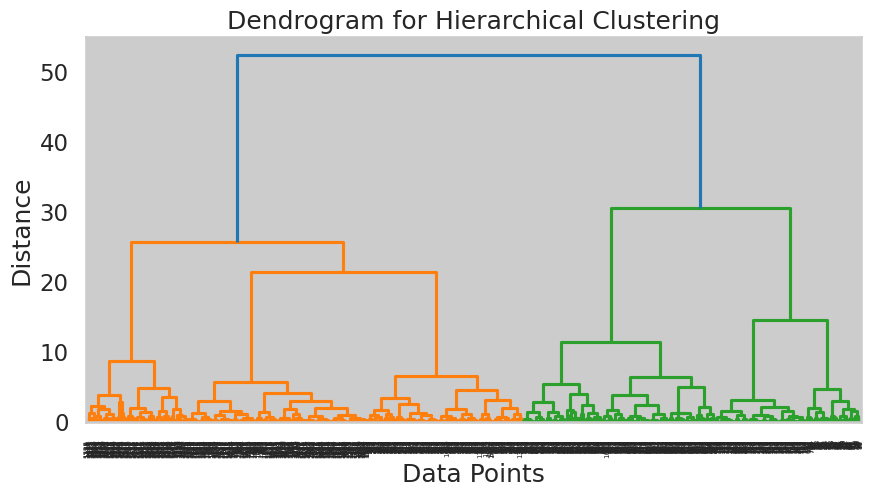

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


linkage_list = ["average", "single", "complete", "ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
distance_thresholds = [2, 5, 10]  # Try different distance thresholds

best_silhouette = -1
best_params = {}

# Loop over different clustering configurations
for affinity in affinity_list:
    for linkage in linkage_list:
        for distance_threshold in distance_thresholds:
            # Skip invalid combinations (ward only works with euclidean)
            if linkage == "ward" and affinity != "euclidean":
                continue

            # Create the model
            model = AgglomerativeClustering(n_clusters=None,
                                            metric=affinity,
                                            linkage=linkage,
                                            distance_threshold=distance_threshold,
                                            compute_full_tree=True)

            labels = model.fit_predict(scaled_Multi)

            # Ensure the model created more than 1 cluster before evaluating silhouette score
            if len(set(labels)) > 1:
                silhouette = silhouette_score(scaled_Multi, labels)
                print(f"Silhouette Score for affinity={affinity}, linkage={linkage}, distance_threshold={distance_threshold}: {silhouette}")

                # Save best model parameters
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_params = {
                        "affinity": affinity,
                        "linkage": linkage,
                        "distance_threshold": distance_threshold,
                        "silhouette_score": silhouette
                    }
                    best_labels = labels  # Store labels for the best clustering

                # Plot clustering result for each trial
                plt.figure(figsize=(6, 5))
                plt.scatter(scaled_Multi[:, 0], scaled_Multi[:, 1], c=labels, cmap='tab10', edgecolors='k', alpha=0.7)
                plt.title(f"Clusters for {linkage}-{affinity}, d={distance_threshold}")
                plt.xlabel("Feature 1")
                plt.ylabel("Feature 2")
                plt.colorbar(label="Cluster")
                plt.show()

# Print the best configuration
print("\nBest Agglomerative Clustering configuration:")
print(best_params)

# Plot the best clustering result
plt.figure(figsize=(6, 5))
plt.scatter(scaled_Multi[:, 0], scaled_Multi[:, 1], c=best_labels, cmap='tab10', edgecolors='k', alpha=0.7)
plt.title(f"Best Clustering: {best_params['linkage']}-{best_params['affinity']}, d={best_params['distance_threshold']}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# --- Plot a Dendrogram for a single trial ---
plt.figure(figsize=(10, 5))
linked = sch.linkage(scaled_Multi, method="ward")  # Use "ward" for a clear dendrogram
sch.dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



In [ ]:
# After running the Agglomerative Clustering, the best configuration's parameters are : euclidean, ward, 10 with silhouette score of 0.45866
# its importaht to note that not all combinations of the parameters are valid, for example, ward only works with euclidean
# these parameters led to 7 clusters

# The extra cluster in Agglomerative Clustering most likely came from the linkage method or an early stopping in merging due to the distance threshold.
# It could also be due to cluster shape differences compared to K-Means.

# DBScan
* Use DBScan function to cluster the above data.
* In the  DBscan change the following parameters:
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case.
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques.
* Record your observations and comments.

In [40]:
!pip install kneed

Optimal EPS value: 0.342


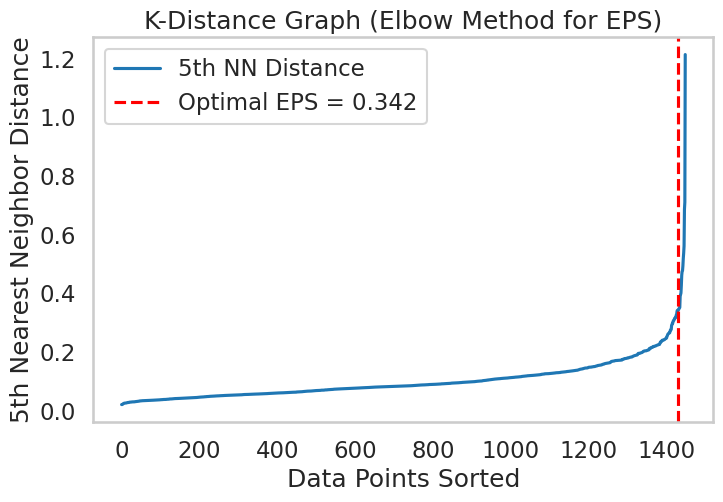

In [ ]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Compute k-nearest neighbors (k=5 is a good default)
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(scaled_Multi)
distances, indices = neigh.kneighbors(scaled_Multi)

# Sort the distances to find the elbow point
sorted_distances = np.sort(distances[:, -1])

# Find the optimal eps value using KneeLocator
knee = KneeLocator(range(len(sorted_distances)), sorted_distances, curve="convex", direction="increasing")

# The best eps value (y-value at the knee)
optimal_eps = sorted_distances[knee.knee]

print(f"Optimal EPS value: {optimal_eps:.3f}")

# Plot with the knee marked
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, label="5th NN Distance")
plt.axvline(knee.knee, color="r", linestyle="--", label=f"Optimal EPS = {optimal_eps:.3f}")
plt.xlabel("Data Points Sorted")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph (Elbow Method for EPS)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# The k-distance graph helps in choosing the best epsilon (eps) for DBSCAN.
# We sort the k-distances and plot them.
# The "elbow" point on the curve is a good estimate for eps.
# If eps is too small, many points become noise. If it's too large, clusters merge.

eps: 0.10, min_samples: 5, Clusters: 26, Silhouette Score: -0.2507
eps: 0.10, min_samples: 10, Clusters: 8, Silhouette Score: -0.2083
eps: 0.10, min_samples: 15, Clusters: 7, Silhouette Score: -0.2652
eps: 0.10, min_samples: 20, Clusters: 2, Silhouette Score: -0.1913
eps: 0.10, min_samples: 25, Clusters: 2, Silhouette Score: -0.3042
eps: 0.31, min_samples: 20, Clusters: 2, Silhouette Score: 0.3010
eps: 0.31, min_samples: 25, Clusters: 3, Silhouette Score: 0.2233


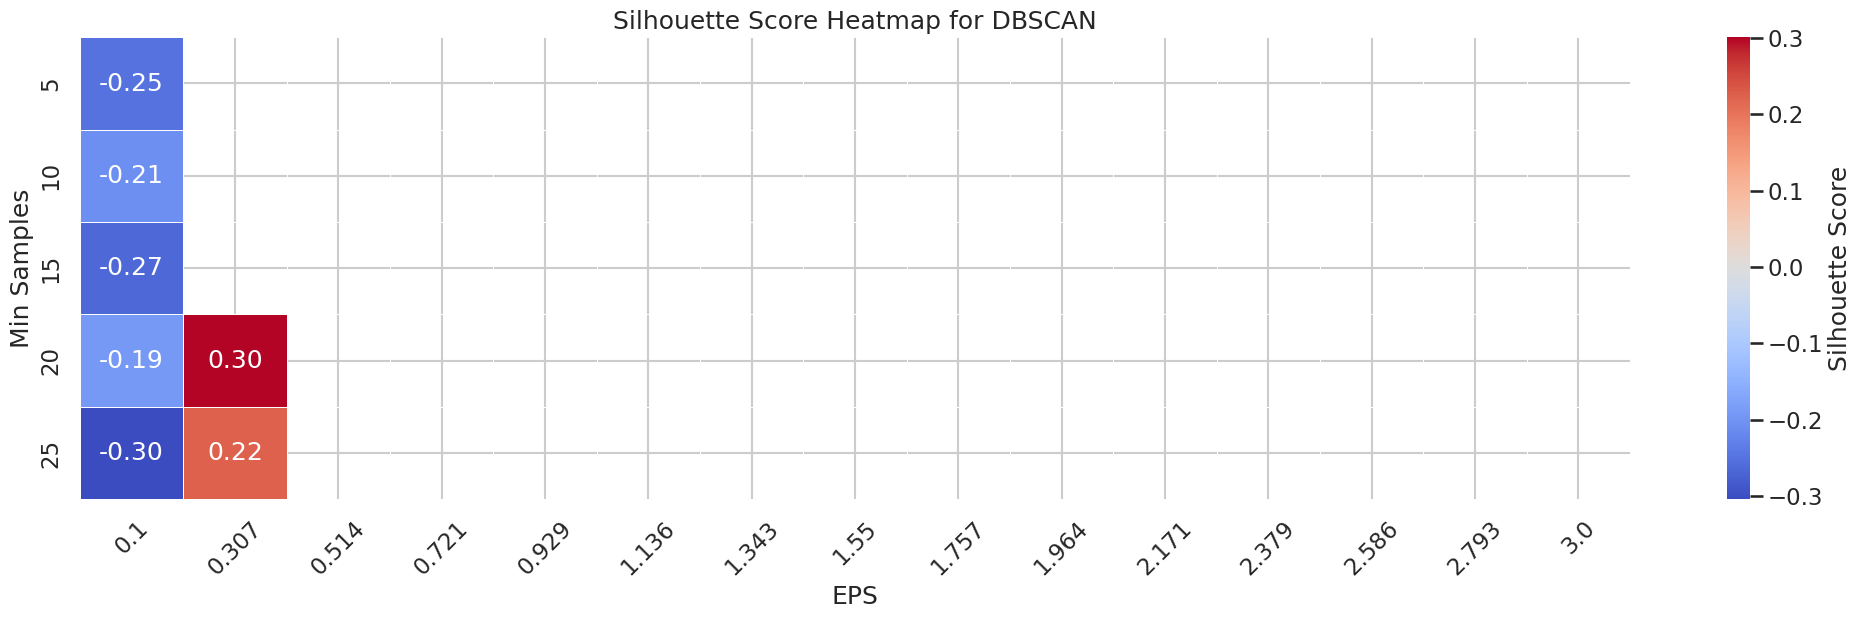


Best Parameters:
EPS: 0.307, Min Samples: 20, Clusters: 2
Best Silhouette Score: 0.3010


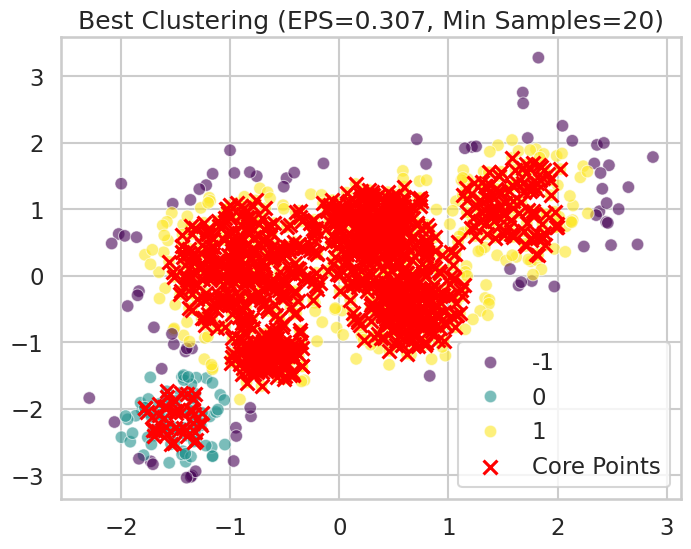

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# Define parameter ranges
eps_values = np.linspace(0.1, 3, 15)  # Reduce number of steps for clarity
min_samples_values = range(5, 30, 5)  # More range for Min Samples

# Store results
results = []
best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(scaled_Multi)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(scaled_Multi, labels)
        results.append((eps, min_samples, score, n_clusters))

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

        # Print each iteration's results
        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Convert results to a NumPy array
results = np.array(results, dtype=object)

# Create a pivot table for heatmap
heatmap_data = np.full((len(min_samples_values), len(eps_values)), np.nan)

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        match = results[(results[:, 0] == eps) & (results[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap_data[i, j] = match[0, 2]  # Silhouette score

# Plot the heatmap
plt.figure(figsize=(25, 6))
ax = sns.heatmap(heatmap_data, xticklabels=np.round(eps_values, 3),
                 yticklabels=min_samples_values, cmap="coolwarm", annot=True,
                 fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Silhouette Score'})

plt.xlabel("EPS")
plt.ylabel("Min Samples")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Silhouette Score Heatmap for DBSCAN")
plt.show()

# Print Best Parameters
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plot best clustering result
best_eps, best_min_samples, _ = best_params
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(scaled_Multi)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_Multi[:, 0], y=scaled_Multi[:, 1], hue=best_labels, palette='viridis', alpha=0.6)
plt.scatter(best_model.components_[:, 0], best_model.components_[:, 1], c='red', marker='x', s=100, label='Core Points')
plt.title(f"Best Clustering (EPS={best_eps:.3f}, Min Samples={best_min_samples})")
plt.legend()
plt.show()

In [ ]:
# DBSCAN (Density-Based Spatial Clustering) groups points based on density.
# It does not require specifying the number of clusters in advance.
# Instead, it uses 'eps' (neighborhood radius) and 'min_samples' (minimum points in a dense region).
# Points are classified as:
#  Core points: Have at least 'min_samples' neighbors within 'eps'.
#  Border points: Are within 'eps' of a core point but have fewer than 'min_samples' neighbors.
#  Noise points: Do not belong to any cluster.

# If DBSCAN detects fewer clusters than expected:
#  eps might be too large, merging clusters.
#  eps might be too small, making clusters fragmented or increasing noise.
#  The dataset might have varying density, affecting clustering performance.

# DBSCAN detected only 2 clusters instead of the expected 6.
# Possible reasons:
# 1. The 'eps' value may be too high, merging multiple clusters into one.
# 2. The dataset has varying densities, and DBSCAN is sensitive to density changes.
# 3. Some clusters may have been considered noise due to the 'min_samples' threshold.
# 4. DBSCAN works better for non-spherical clusters, but multi-blob data is well-separated.
# 5. The multi-blob dataset has equally sized clusters, so DBSCAN should work well.
#    However, if two blobs are close together, DBSCAN may merge them if eps is too large.
#    This might explain why only 2 clusters appeared instead of 6.


# Heatmap Explanation:
# This heatmap visualizes how the Silhouette Score changes for different values of:
#   - 'eps' (neighborhood radius)
#   - 'min_samples' (minimum points required to form a dense region)
# The goal is to find the combination of 'eps' and 'min_samples' that produces
# the highest Silhouette Score, indicating the best clustering quality.


# Why Are Most Silhouette Scores Negative?
#   A negative Silhouette Score means that many points are closer to points in another cluster
#   than to points in their own assigned cluster. This suggests poor separation.


In [ ]:
# As seen from the silhouette scores , k-means clustering yeild the best silhouette score of 0.4861, which was predicted
# since the data is spherical, k-means clusters better than the rest

## iris data set
The iris data set is test data set that is part of the Sklearn module
which contains 150 records each with 4 features. All the features are represented by real numbers.

The data represents three classes.


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

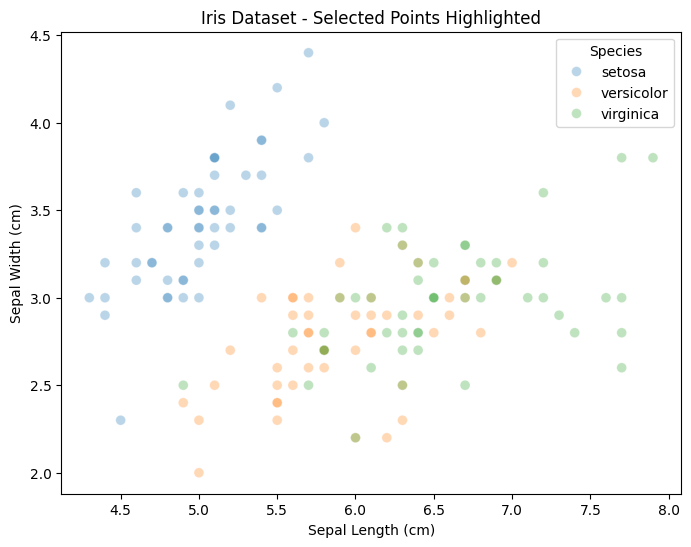

In [ ]:

# Convert to Pandas DataFrame
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target  # Add target labels
df['species'] = df['target'].apply(lambda x: iris_data.target_names[x])  # Map target numbers to species names

# Select specific rows (indices 10, 25, 50)
selected_indices = [10, 25, 50]
selected_data = df.iloc[selected_indices]

# Plot the full dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['species'], alpha=0.3, s=50)

# Highlight the selected points
#sns.scatterplot(x=selected_data['sepal length (cm)'], y=selected_data['sepal width (cm)'],
#               hue=selected_data['species'], s=200, edgecolor='black', legend=False)

# Labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Selected Points Highlighted')
plt.legend(title="Species")
plt.show()

* Repeat all the above clustering approaches and steps on the above data.
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches.
* Is your clustering outcome consistent with the labels?

# K-means "Iris data set" (Before scaling)


In [ ]:
# K-means clustering without scaling :


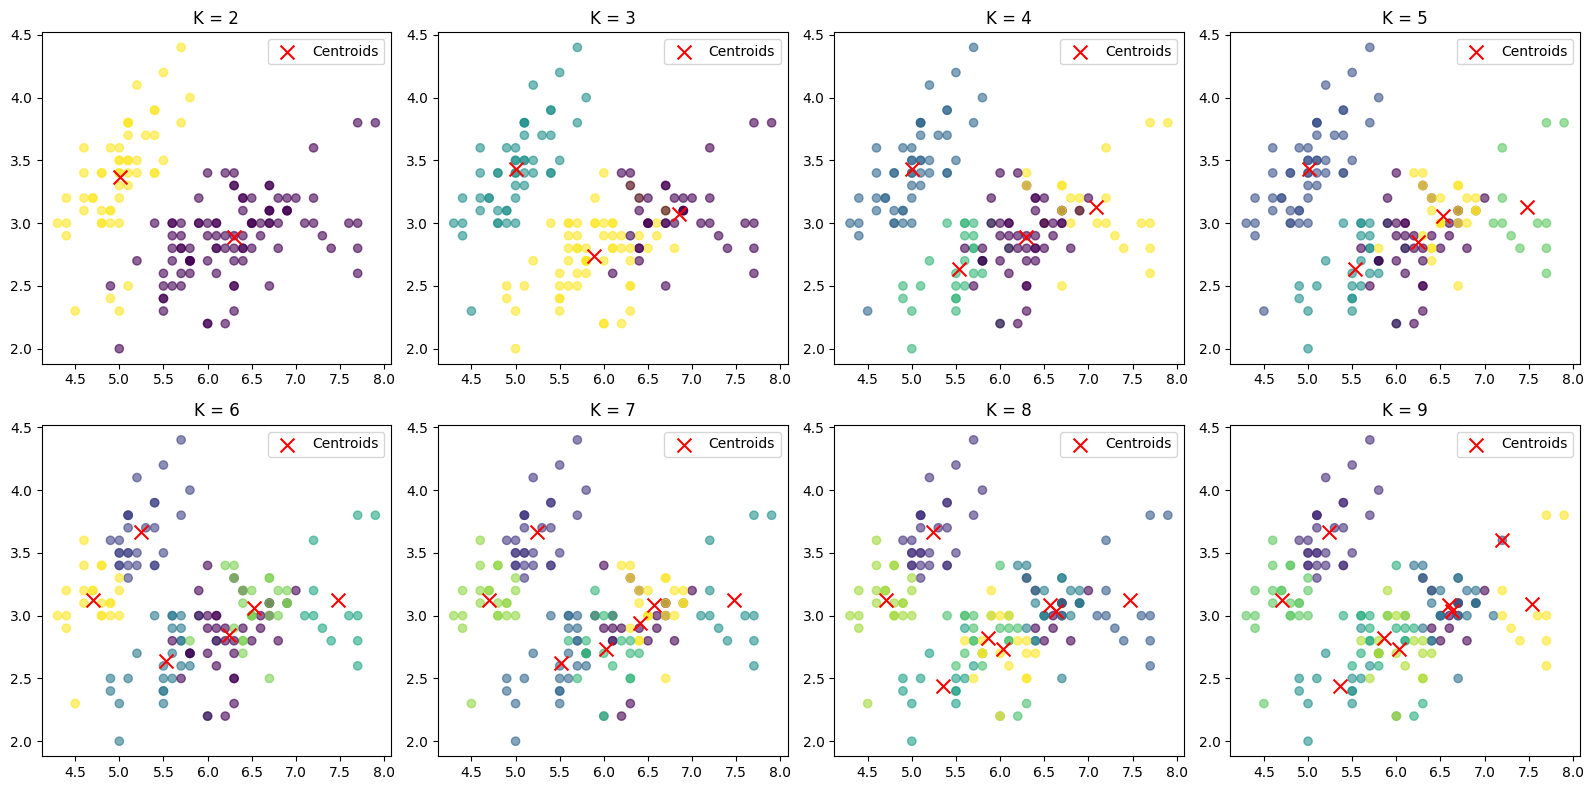

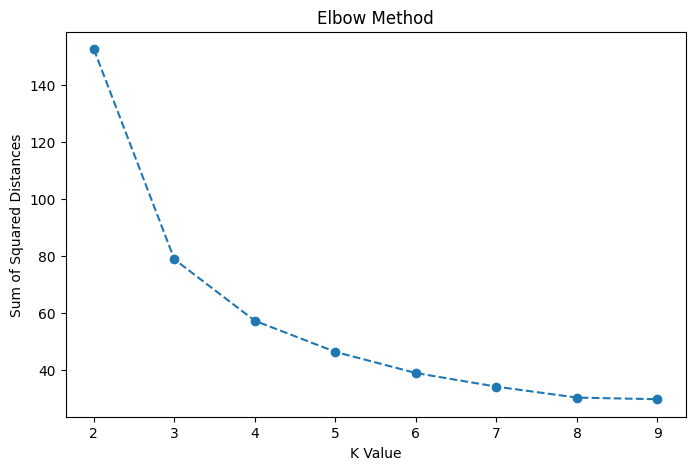

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Store SSD for elbow method
ssd = []

# Define number of clusters to test
k_values = range(2, 10)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust size and layout

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(iris_data.data)  # Assign clusters

    ssd.append(model.inertia_)  # Store sum of squared distances

    # Plot clusters
    ax = axes[i // 4, i % 4]  # Adjust for subplots
    ax.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    ax.set_title(f'K = {k}')
    ax.legend()

plt.tight_layout()
plt.show()

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

In [ ]:
# no clear elbow was shown, trying silhouette score instead

Sil score for k=2: 0.6810
Sil score for k=3: 0.5512
Sil score for k=4: 0.4976
Sil score for k=5: 0.4931
Sil score for k=6: 0.3678
Sil score for k=7: 0.3543
Sil score for k=8: 0.3447
Sil score for k=9: 0.3156
Sil score for k=10: 0.3014


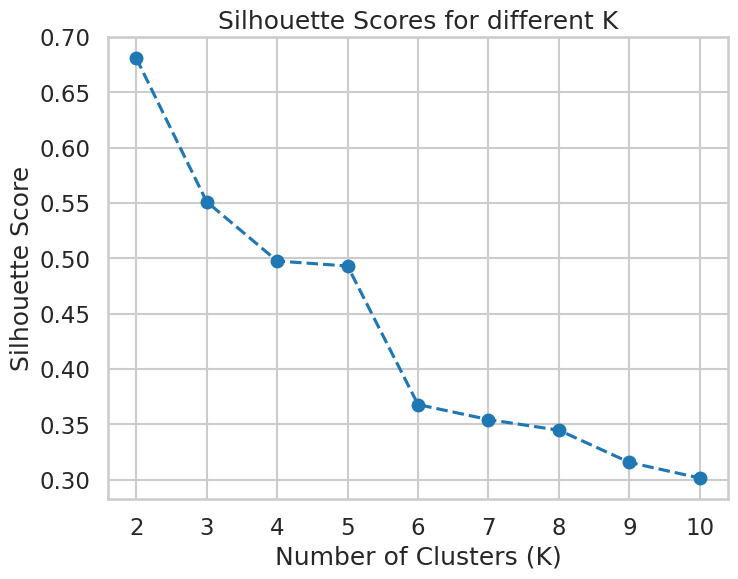

The optimal number of clusters (K) is: 2


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K_range = range(2, 11)  # Test values of K from 2 to 10

# Step 4: Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_data.data)
    labels = kmeans.labels_

    # Calculate silhouette score for the current K
    score = silhouette_score(iris_data.data, labels)
    print(f"Sil score for k={k}: {score:.4f}")
    silhouette_scores.append(score)

# Step 5: Plot silhouette scores to visualize the best K
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 6: Find the optimal K (maximum silhouette score)
optimal_K2 = K_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (K) is: {optimal_K2}")

In [ ]:
# this data set SHOULD be classified into 3 clusters, since it has 3 types of flowers, howerver, neither methods gave k=3
# The Silhouette Score measures how well-separated clusters are.
# If the dataset has two dominant groups in terms of structure, K=2 can maximize separation (even if the real-world labels suggest K=3).
# Since Setosa (label 0) is very different from the other two flower types, the algorithm might treat Versicolor and Virginica as one group.
# The elbow method (SSD/inertia) measures compactness (how close points are to their assigned cluster).
# If inertia keeps decreasing gradually instead of showing a clear elbow, it can sometimes overestimate the number of clusters.
# K-Means tries to minimize variance, so it might split one real-world class into multiple sub-clusters.

In [ ]:
# We will try clustering using k=3 (which wasn't the solution in any method) then once again with K=2 "silhoutte score method"

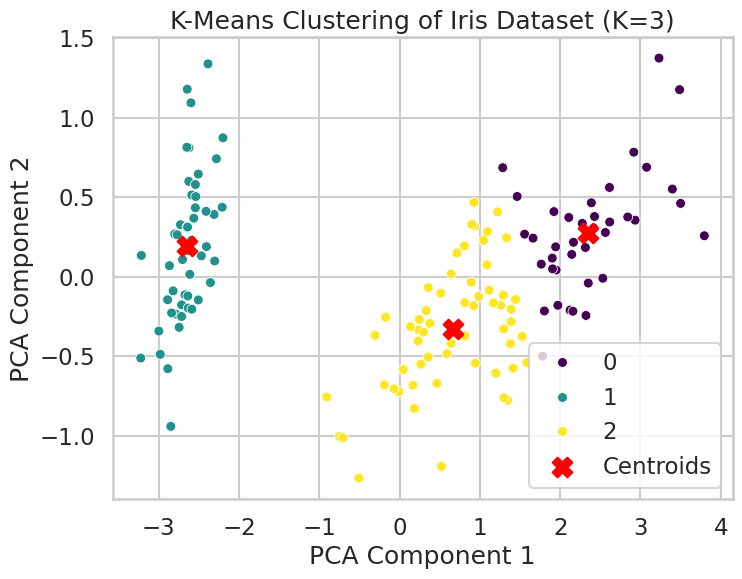

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load Iris dataset
iris_data = load_iris()
X = iris_data.data  # Features

# Apply K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroids to PCA space

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c="red", marker="X", label="Centroids")  # Corrected centroids
plt.title("K-Means Clustering of Iris Dataset (K=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()



In [ ]:
# if we refer back to the first plotted graph for this data set, choosing k=3 gave the clustering that was expected from the start.

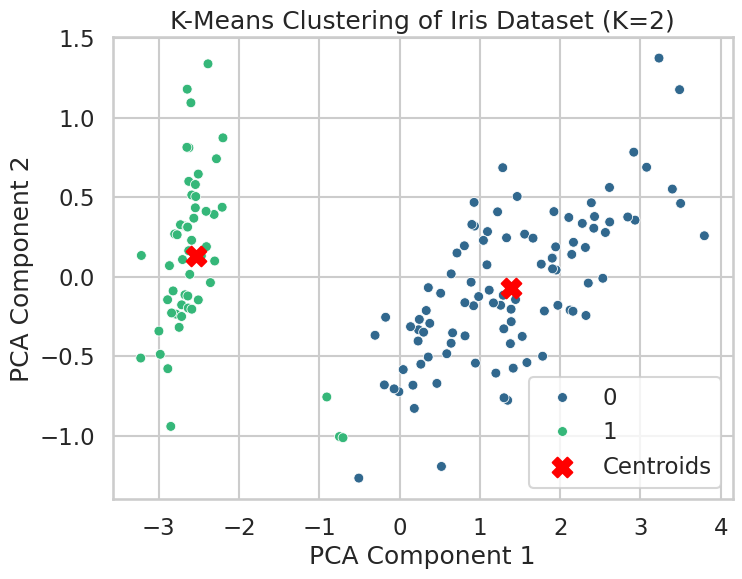

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


# Apply K-Means with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroids to PCA space

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c="red", marker="X", label="Centroids")  # Corrected centroids
plt.title("K-Means Clustering of Iris Dataset (K=2)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()



In [ ]:
# its clear form both graphs that there are 2 clusters that were merged , because their data are close, thats why the silhoutte score method confused them

# K-means "Iris data set" (After scaling)

In [ ]:
# k-means clustering with scaled data :

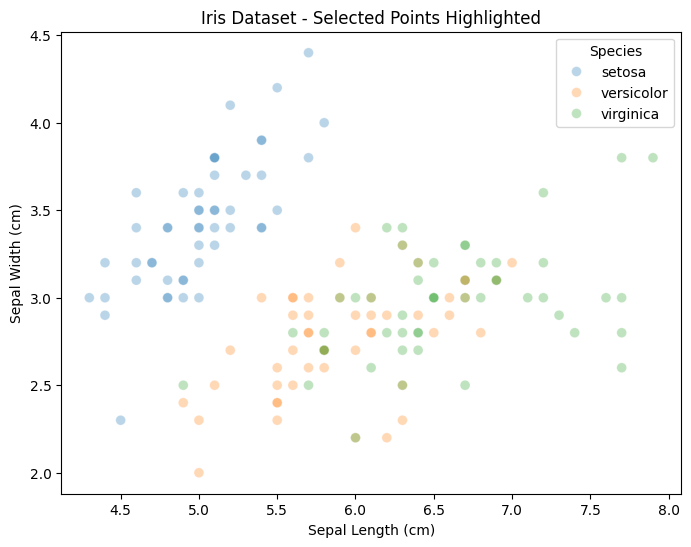

In [ ]:
# scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_iris = scaler.fit_transform(iris_data.data)

# Convert to Pandas DataFrame
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target  # Add target labels
df['species'] = df['target'].apply(lambda x: iris_data.target_names[x])  # Map target numbers to species names

# Select specific rows (indices 10, 25, 50)
selected_indices = [10, 25, 50]
selected_data = df.iloc[selected_indices]

# Plot the full dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['species'], alpha=0.3, s=50)

# Highlight the selected points
#sns.scatterplot(x=selected_data['sepal length (cm)'], y=selected_data['sepal width (cm)'],
#               hue=selected_data['species'], s=200, edgecolor='black', legend=False)

# Labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Selected Points Highlighted')
plt.legend(title="Species")
plt.show()

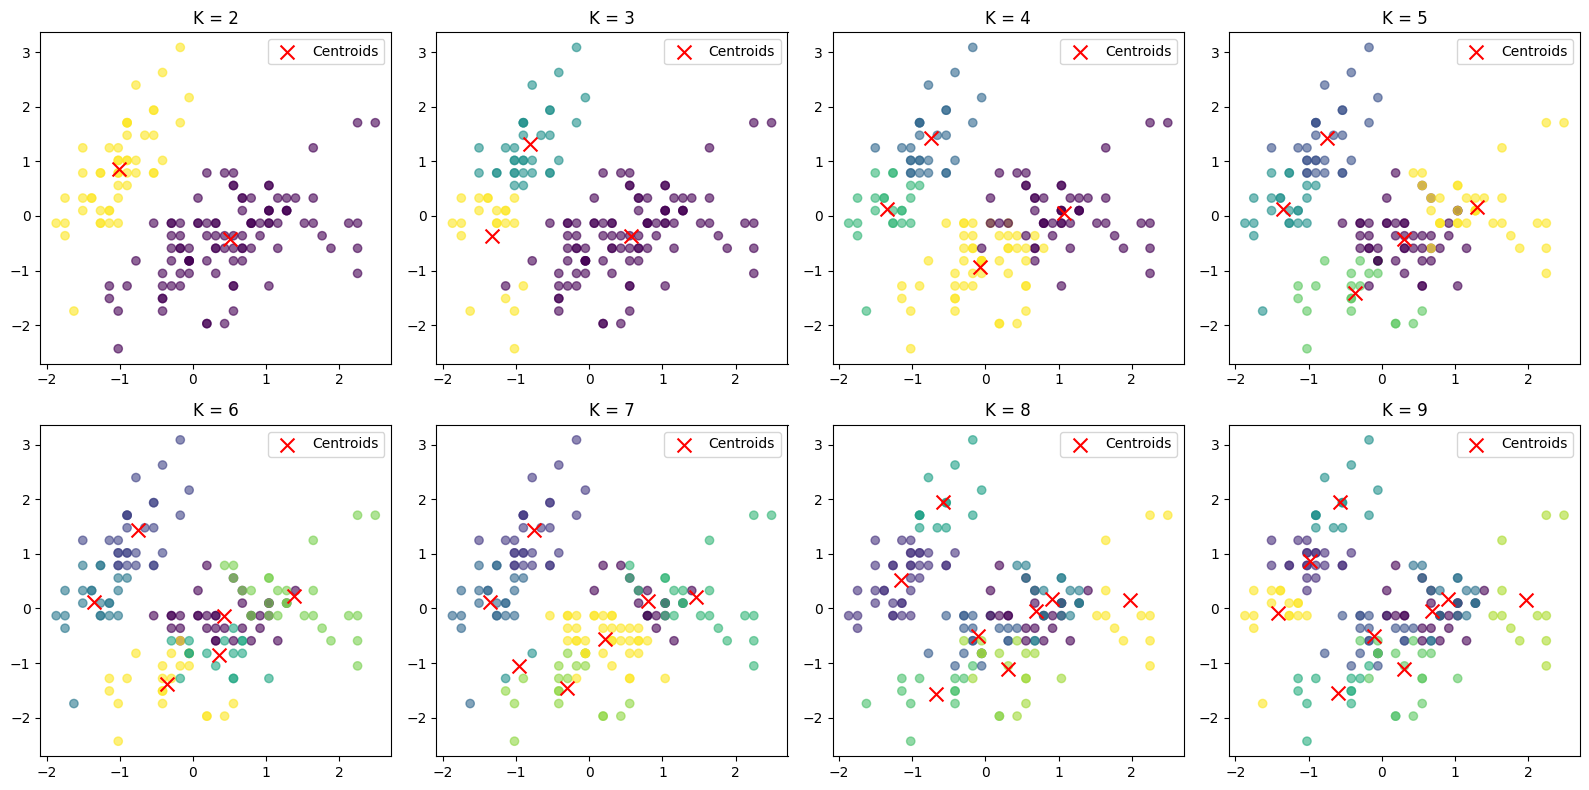

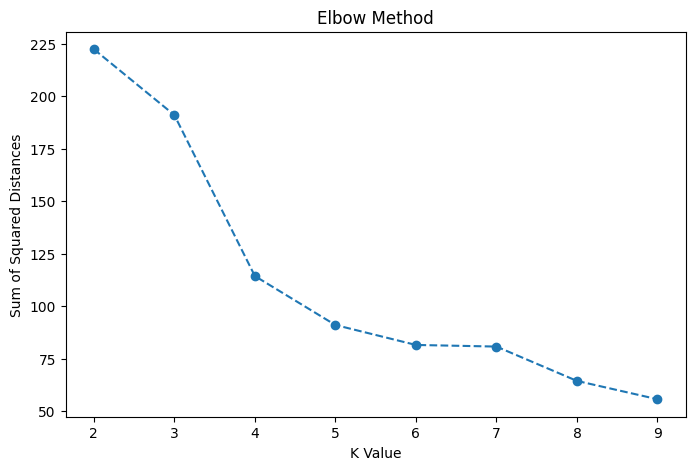

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Store SSD for elbow method
ssd = []

# Define number of clusters to test
k_values = range(2, 10)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust size and layout

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(scaled_iris)  # Assign clusters

    ssd.append(model.inertia_)  # Store sum of squared distances

    # Plot clusters
    ax = axes[i // 4, i % 4]  # Adjust for subplots
    ax.scatter(scaled_iris[:, 0], scaled_iris[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    ax.set_title(f'K = {k}')
    ax.legend()

plt.tight_layout()
plt.show()

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

Sil score for k=2: 0.5818
Sil score for k=3: 0.4799
Sil score for k=4: 0.3850
Sil score for k=5: 0.3450
Sil score for k=6: 0.3339
Sil score for k=7: 0.2664
Sil score for k=8: 0.3416
Sil score for k=9: 0.3244
Sil score for k=10: 0.3354


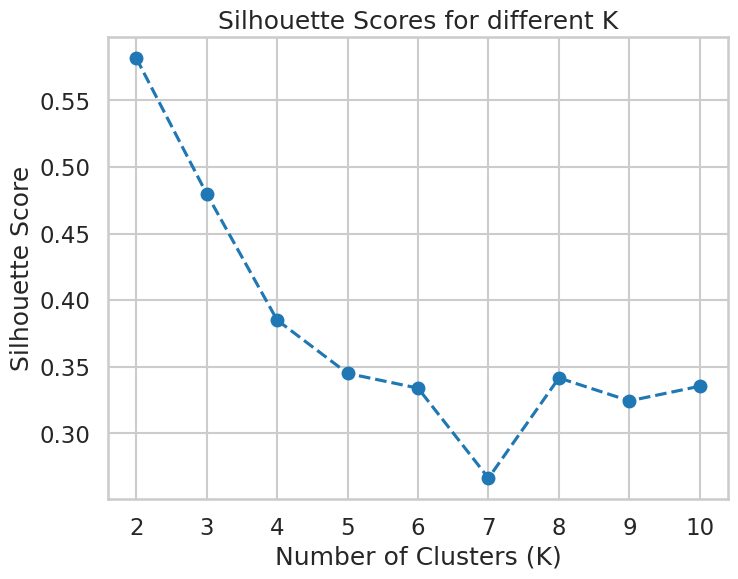

The optimal number of clusters (K) is: 2


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K_range = range(2, 11)  # Test values of K from 2 to 10

# Step 4: Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_iris)
    labels = kmeans.labels_

    # Calculate silhouette score for the current K
    score = silhouette_score(scaled_iris, labels)
    print(f"Sil score for k={k}: {score:.4f}")
    silhouette_scores.append(score)

# Step 5: Plot silhouette scores to visualize the best K
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 6: Find the optimal K (maximum silhouette score)
optimal_K3 = K_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (K) is: {optimal_K3}")

In [ ]:
# Even after scaling, Versicolor and Virginica remain very similar, making K-Means think they should be in the same cluster (K=2).
# K-Means works best when clusters are well-separated and compact (circular blobs).
# In the Iris dataset, clusters are not perfectly spherical—especially Versicolor and Virginica, which are more elongated and overlapping.

In [ ]:
# clustering the scaled data using k=3 :

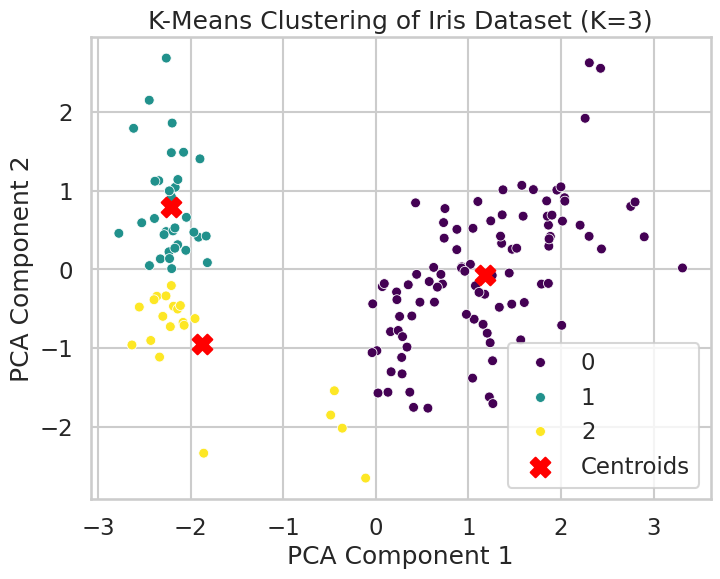

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


# Apply K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_iris)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_iris)
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroids to PCA space

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c="red", marker="X", label="Centroids")  # Corrected centroids
plt.title("K-Means Clustering of Iris Dataset (K=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [ ]:
# clustering after scaling changed which data belonged to which cluster. This comes down to how K-Means treats distances in different feature scales.

# The distance relationships between data points changed after scaling.

In [ ]:
# clustering the scaled data using k=2 :

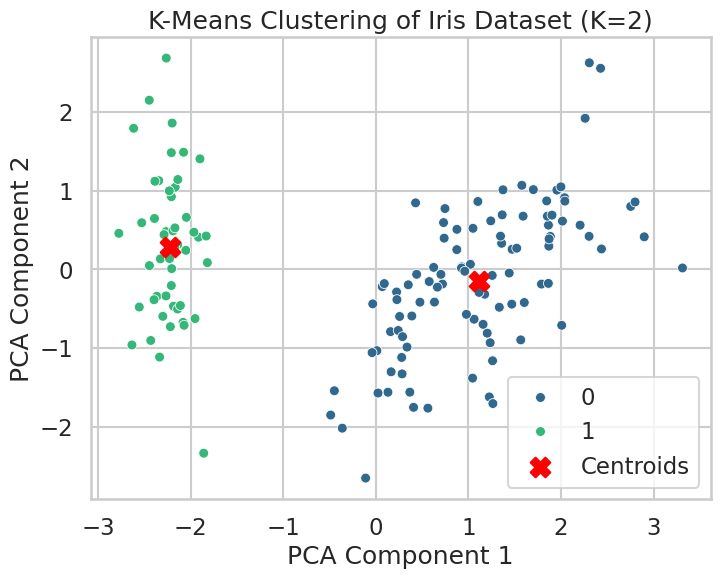

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


# Apply K-Means with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled_iris)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_iris)
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroids to PCA space

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c="red", marker="X", label="Centroids")  # Corrected centroids
plt.title("K-Means Clustering of Iris Dataset (K=2)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()



In [ ]:
# it is important to know that the clustering assignment changed with scaling, however still the same number of clusters

In [ ]:
# Why Did Scaling Not Change the Clustering Result?
# - K-Means is a distance-based algorithm, so feature scaling is usually important.
# - However, in the Iris dataset, the **original feature scales were already similar**:
#   - Sepal Length & Width ≈ 4-8 cm
#   - Petal Length & Width ≈ 0-7 cm
# - The difference in feature magnitudes **was not extreme**, meaning the algorithm
#   still grouped the data the same way before and after scaling.
# - If one feature had been **much larger** (e.g., in thousands while others were in centimeters),
#   then scaling would have significantly affected the clustering.

# Why Did Clustering Assignments Change After Scaling?
# - K-Means assigns clusters based on distances, and scaling affects how distances are measured.
# - Before scaling, petal features (which best separate species) had **larger values**,
#   meaning they influenced clustering more.
# - After scaling, **all features had equal importance**, even though some were less relevant
#   for distinguishing clusters.
# - This changed how K-Means grouped points, leading to different cluster assignments.
# - The result was **less accurate clustering after scaling**, because features that
#   were less important gained influence.

# Why Did the Silhouette Score Drop After Scaling?
# - The silhouette score measures **how well-separated clusters are**.
# - Before scaling, petal measurements (which best separate species) had a larger
#   influence on distance calculations, leading to **better-defined clusters**.
# - After scaling, K-Means treated **all features equally**, even though
#   sepal measurements do not separate species as well.
# - This caused **some misclassified points**, making clusters overlap more
#   and lowering the silhouette score.

# so we can conclude that scaling such data set didn't fix our problem "k=2 instead of k=3", moreover, it introduced more probems

# Hierarchal Clustering "Iris data set" (Before scaling)

Silhouette Score for affinity=euclidean, linkage=average, distance_threshold=2: 0.6867350732769777


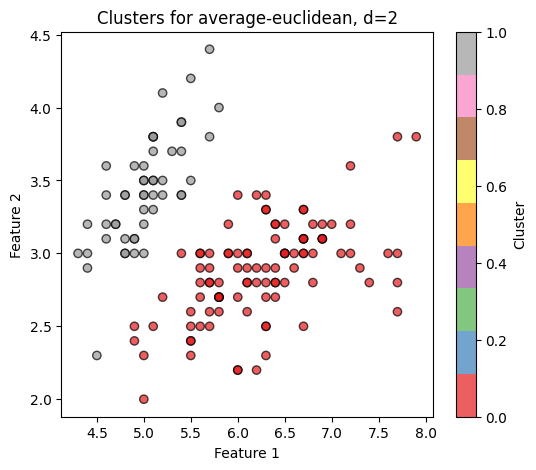

Silhouette Score for affinity=euclidean, linkage=complete, distance_threshold=2: 0.33820313796202034


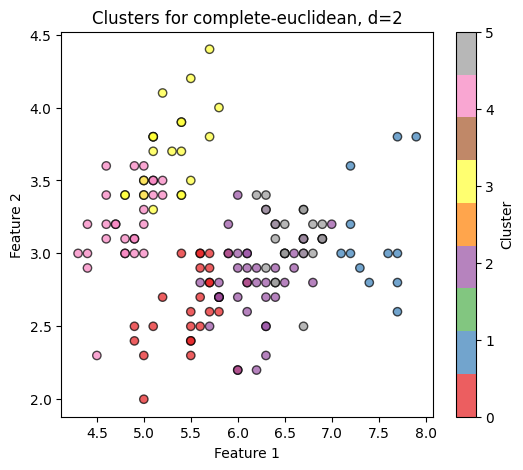

Silhouette Score for affinity=euclidean, linkage=complete, distance_threshold=5: 0.5159829508133176


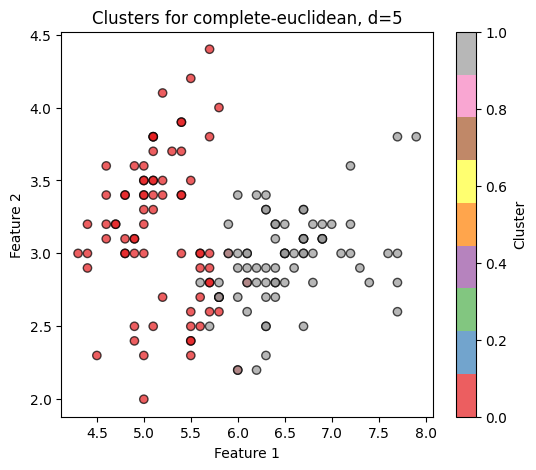

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=2: 0.3304886352874657


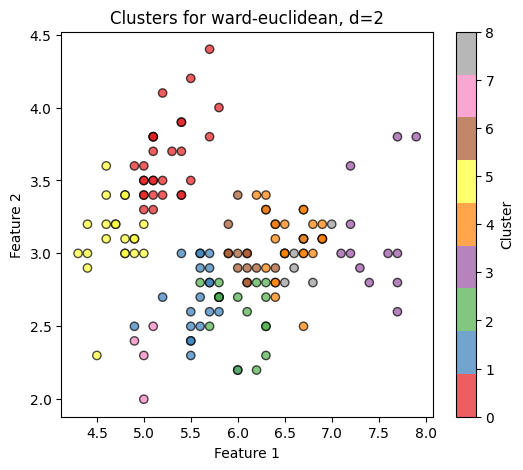

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=5: 0.4889670857554692


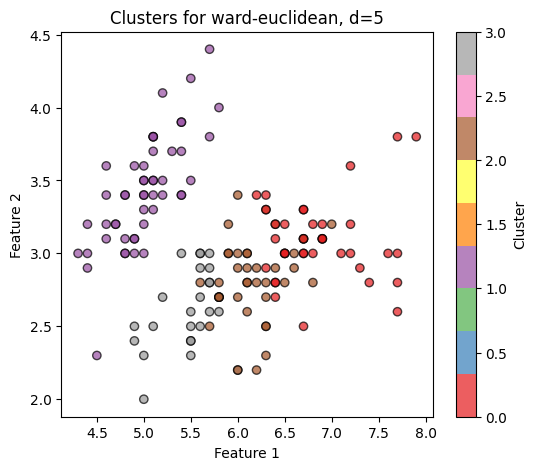

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=10: 0.5543236611296419


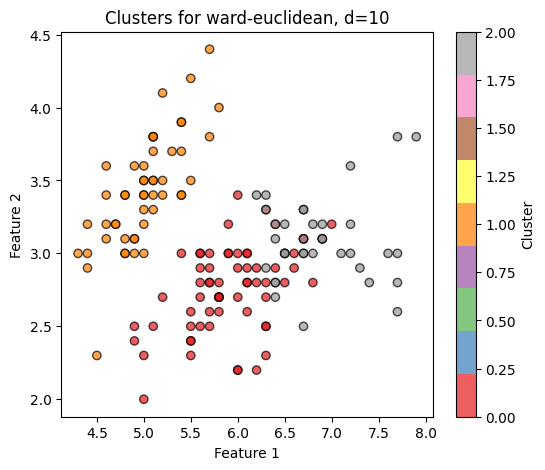

Silhouette Score for affinity=manhattan, linkage=average, distance_threshold=2: 0.43184804588959724


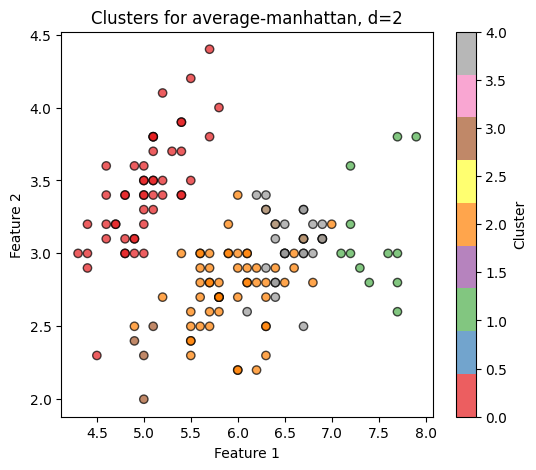

Silhouette Score for affinity=manhattan, linkage=average, distance_threshold=5: 0.6867350732769777


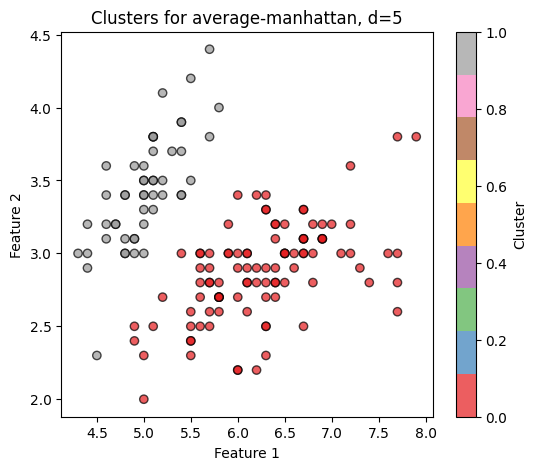

Silhouette Score for affinity=manhattan, linkage=single, distance_threshold=2: 0.6867350732769777


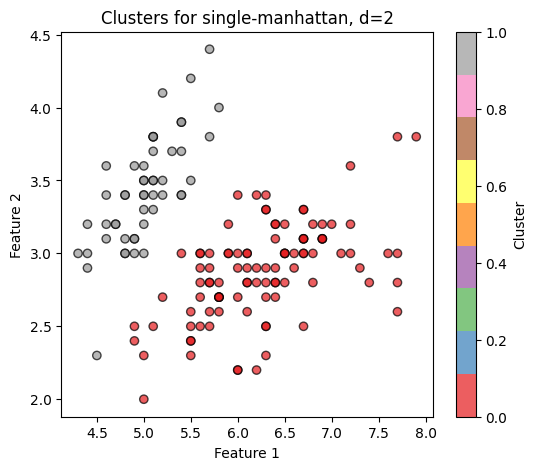

Silhouette Score for affinity=manhattan, linkage=complete, distance_threshold=2: 0.26590529939995255


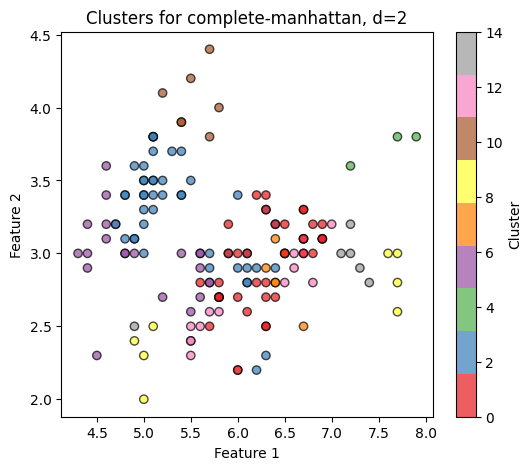

Silhouette Score for affinity=manhattan, linkage=complete, distance_threshold=5: 0.5543665902228473


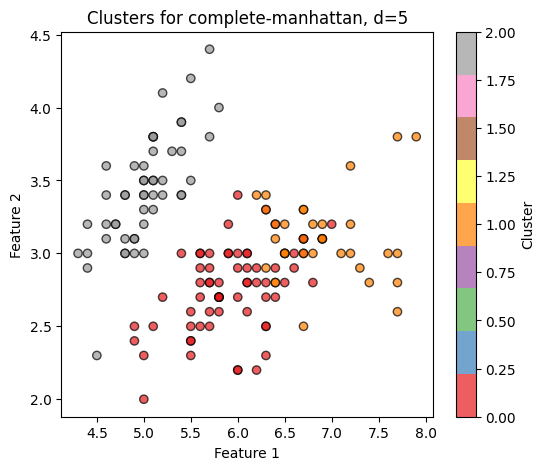

Silhouette Score for affinity=manhattan, linkage=complete, distance_threshold=10: 0.3090678928111287


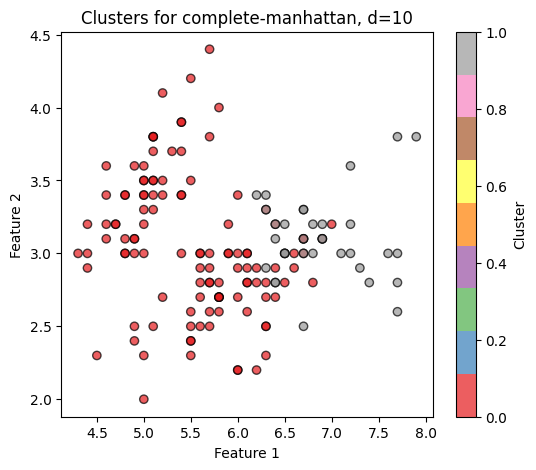


Best Agglomerative Clustering configuration:
{'affinity': 'euclidean', 'linkage': 'average', 'distance_threshold': 2, 'silhouette_score': 0.6867350732769777}


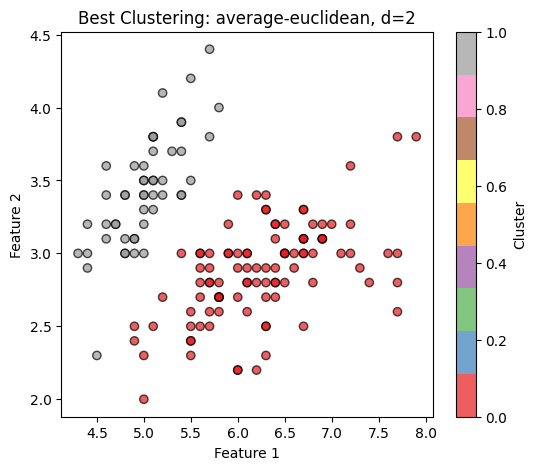

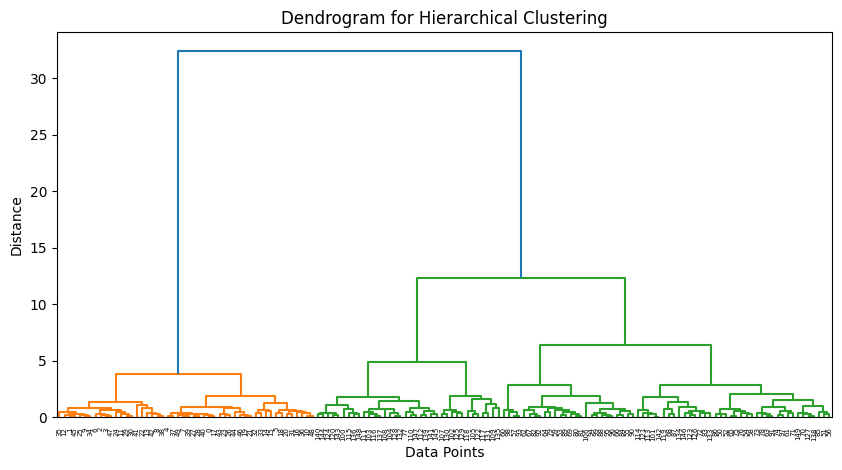

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


linkage_list = ["average", "single", "complete", "ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
distance_thresholds = [2, 5, 10]  # Try different distance thresholds

best_silhouette = -1
best_params = {}

# Loop over different clustering configurations
for affinity in affinity_list:
    for linkage in linkage_list:
        for distance_threshold in distance_thresholds:
            # Skip invalid combinations (ward only works with euclidean)
            if linkage == "ward" and affinity != "euclidean":
                continue

            # Create the model
            model = AgglomerativeClustering(n_clusters=None,
                                            metric=affinity,
                                            linkage=linkage,
                                            distance_threshold=distance_threshold,
                                            compute_full_tree=True)

            labels = model.fit_predict(iris_data.data)

            # Ensure the model created more than 1 cluster before evaluating silhouette score
            if len(set(labels)) > 1:
                silhouette = silhouette_score(iris_data.data, labels)
                print(f"Silhouette Score for affinity={affinity}, linkage={linkage}, distance_threshold={distance_threshold}: {silhouette}")

                # Save best model parameters
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_params = {
                        "affinity": affinity,
                        "linkage": linkage,
                        "distance_threshold": distance_threshold,
                        "silhouette_score": silhouette
                    }
                    best_labels = labels  # Store labels for the best clustering

                # Plot clustering result for each trial
                plt.figure(figsize=(6, 5))
                plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=labels, cmap='Set1', edgecolors='k', alpha=0.7)
                plt.title(f"Clusters for {linkage}-{affinity}, d={distance_threshold}")
                plt.xlabel("Feature 1")
                plt.ylabel("Feature 2")
                plt.colorbar(label="Cluster")
                plt.show()

# Print the best configuration
print("\nBest Agglomerative Clustering configuration:")
print(best_params)

# Plot the best clustering result
plt.figure(figsize=(6, 5))
plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=best_labels, cmap='Set1', edgecolors='k', alpha=0.7)
plt.title(f"Best Clustering: {best_params['linkage']}-{best_params['affinity']}, d={best_params['distance_threshold']}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# --- Plot a Dendrogram for a single trial ---
plt.figure(figsize=(10, 5))
linked = sch.linkage(iris_data.data, method="ward")  # Use "ward" for a clear dendrogram
sch.dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



In [ ]:
# Again, the combo that gave the highest silhouette score yeilded 2 clusters instead of three with silhouette score of 0.6867
# however, if we looked at the gragh of complete-manhatten d=5, it actually did the clustering as we expected (3 instead of 2) with a silhouette score of 0.554
# both have close silhouette score

In [ ]:
"""
Agglomerative Clustering also produced 2 clusters instead of 3.
This suggests that the clustering algorithm detected two well-separated groups,
while the third class was likely too close to another to be considered separate.

The main reason for this merging is that the Versicolor and Virginica species
have overlapping feature distributions, making it harder for clustering to
distinguish them as separate groups.

Both K-Means and Agglomerative Clustering found 2 clusters instead of 3,
which indicates that the feature space does not strongly separate the Versicolor
and Virginica species.

The reason is that the distance-based nature of these algorithms groups
similar points together, and in the case of Iris data, the two classes are
not clearly separable without additional features.
"""

# Hierarchal Clustering "Iris data set" (After scaling)

Silhouette Score for affinity=euclidean, linkage=average, distance_threshold=2: 0.3248248440740702


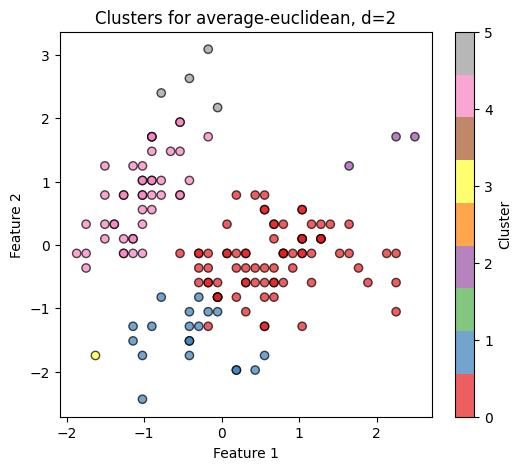

Silhouette Score for affinity=euclidean, linkage=complete, distance_threshold=2: 0.33069471793151667


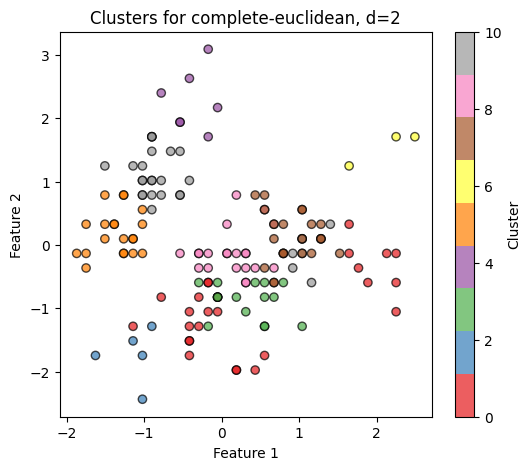

Silhouette Score for affinity=euclidean, linkage=complete, distance_threshold=5: 0.44961848359884726


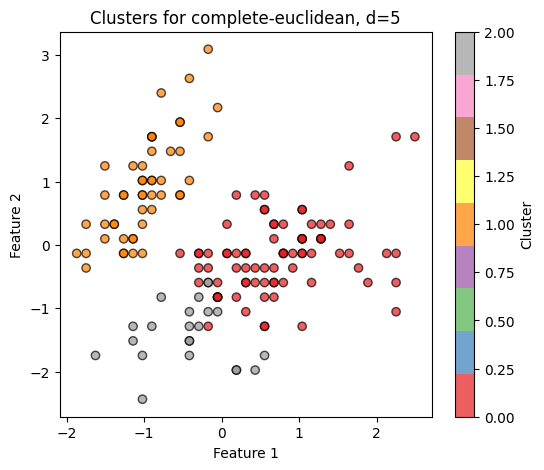

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=2: 0.30868352719401204


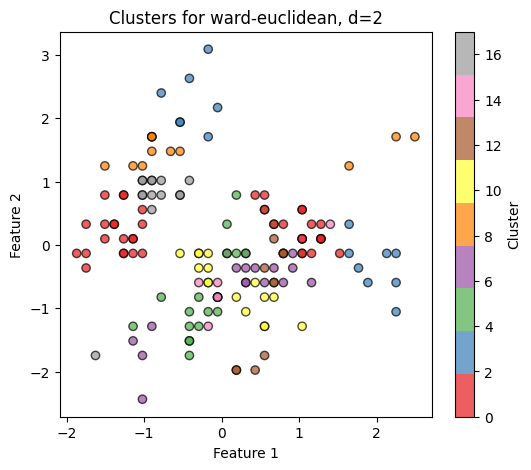

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=5: 0.33058726295230545


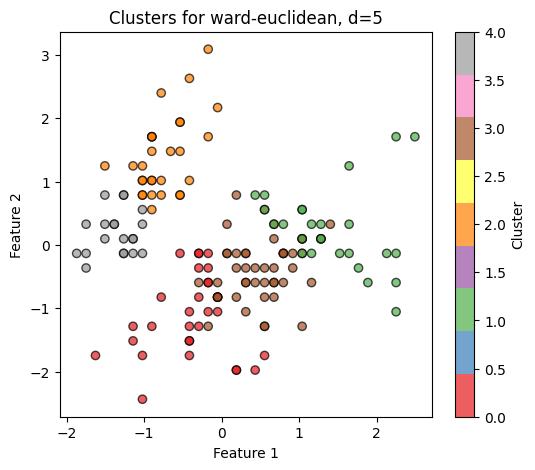

Silhouette Score for affinity=euclidean, linkage=ward, distance_threshold=10: 0.4466890410285909


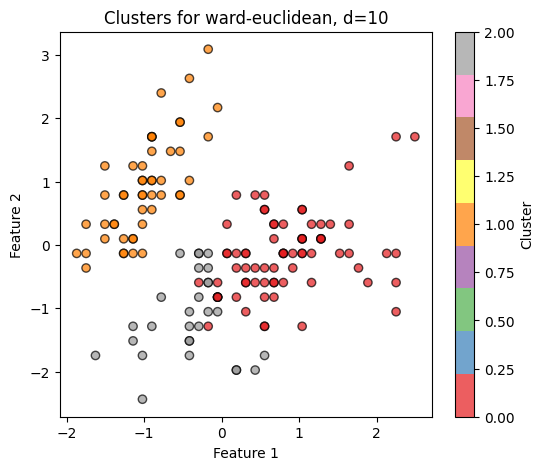

Silhouette Score for affinity=manhattan, linkage=average, distance_threshold=2: 0.2967728660671392


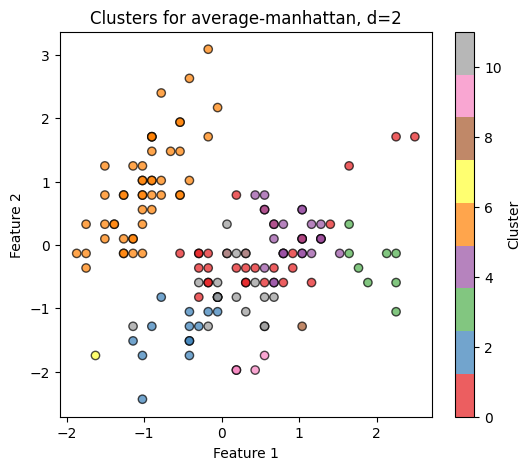

Silhouette Score for affinity=manhattan, linkage=average, distance_threshold=5: 0.5817500491982808


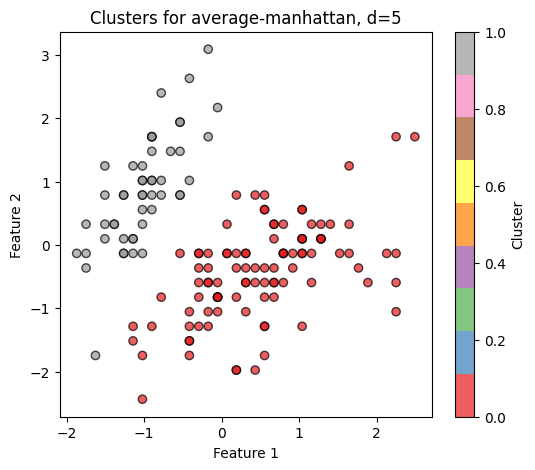

Silhouette Score for affinity=manhattan, linkage=single, distance_threshold=2: 0.5817500491982808


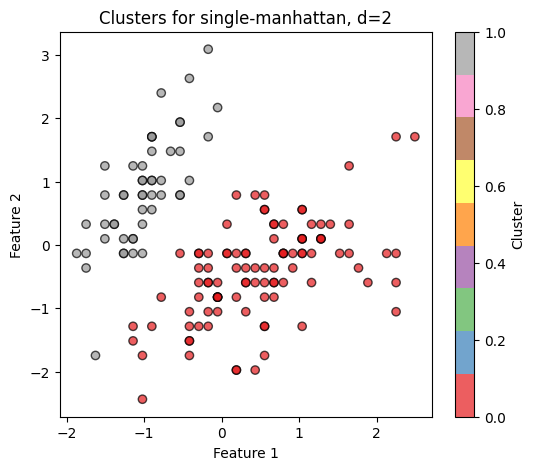

Silhouette Score for affinity=manhattan, linkage=complete, distance_threshold=2: 0.2553152208565517


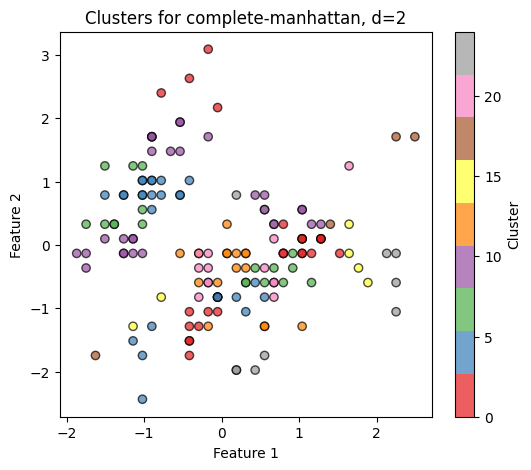

Silhouette Score for affinity=manhattan, linkage=complete, distance_threshold=5: 0.353097686029987


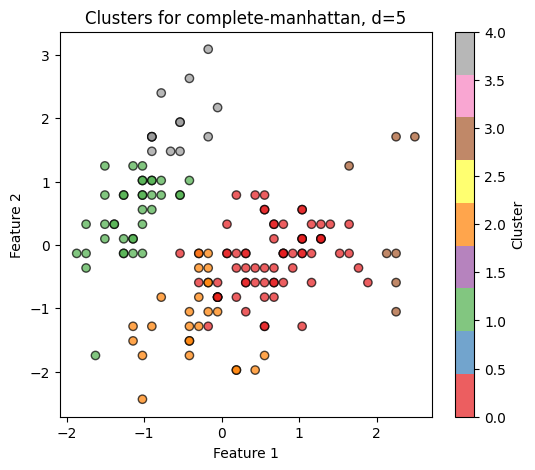

Silhouette Score for affinity=manhattan, linkage=complete, distance_threshold=10: 0.430243819708251


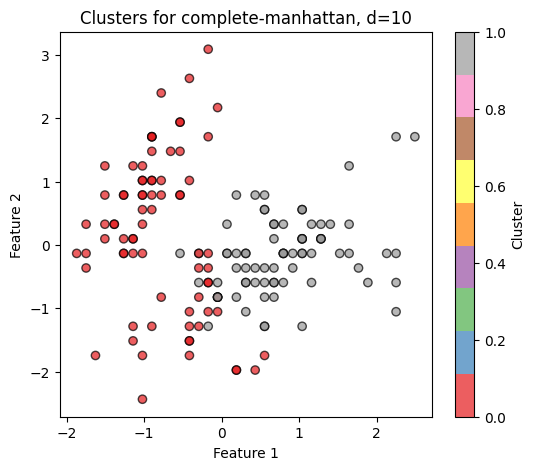


Best Agglomerative Clustering configuration:
{'affinity': 'manhattan', 'linkage': 'average', 'distance_threshold': 5, 'silhouette_score': 0.5817500491982808}


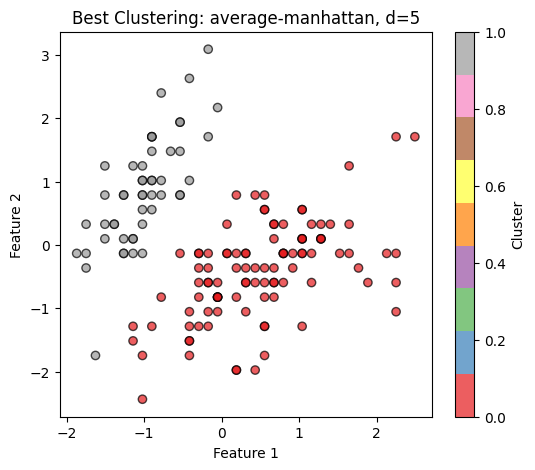

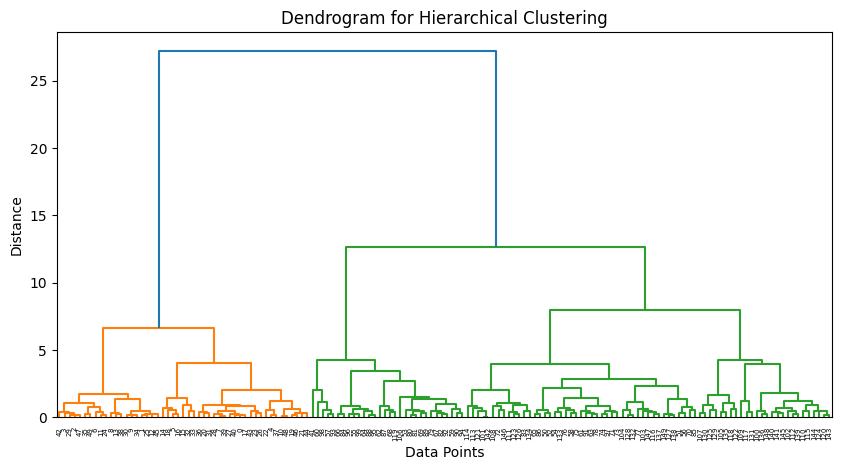

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


linkage_list = ["average", "single", "complete", "ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
distance_thresholds = [2, 5, 10]  # Try different distance thresholds

best_silhouette = -1
best_params = {}

# Loop over different clustering configurations
for affinity in affinity_list:
    for linkage in linkage_list:
        for distance_threshold in distance_thresholds:
            # Skip invalid combinations (ward only works with euclidean)
            if linkage == "ward" and affinity != "euclidean":
                continue

            # Create the model
            model = AgglomerativeClustering(n_clusters=None,
                                            metric=affinity,
                                            linkage=linkage,
                                            distance_threshold=distance_threshold,
                                            compute_full_tree=True)

            labels = model.fit_predict(scaled_iris)

            # Ensure the model created more than 1 cluster before evaluating silhouette score
            if len(set(labels)) > 1:
                silhouette = silhouette_score(scaled_iris, labels)
                print(f"Silhouette Score for affinity={affinity}, linkage={linkage}, distance_threshold={distance_threshold}: {silhouette}")

                # Save best model parameters
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_params = {
                        "affinity": affinity,
                        "linkage": linkage,
                        "distance_threshold": distance_threshold,
                        "silhouette_score": silhouette
                    }
                    best_labels = labels  # Store labels for the best clustering

                # Plot clustering result for each trial
                plt.figure(figsize=(6, 5))
                plt.scatter(scaled_iris[:, 0], scaled_iris[:, 1], c=labels, cmap='Set1', edgecolors='k', alpha=0.7)
                plt.title(f"Clusters for {linkage}-{affinity}, d={distance_threshold}")
                plt.xlabel("Feature 1")
                plt.ylabel("Feature 2")
                plt.colorbar(label="Cluster")
                plt.show()

# Print the best configuration
print("\nBest Agglomerative Clustering configuration:")
print(best_params)

# Plot the best clustering result
plt.figure(figsize=(6, 5))
plt.scatter(scaled_iris[:, 0], scaled_iris[:, 1], c=best_labels, cmap='Set1', edgecolors='k', alpha=0.7)
plt.title(f"Best Clustering: {best_params['linkage']}-{best_params['affinity']}, d={best_params['distance_threshold']}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# --- Plot a Dendrogram for a single trial ---
plt.figure(figsize=(10, 5))
linked = sch.linkage(scaled_iris, method="ward")  # Use "ward" for a clear dendrogram
sch.dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



In [ ]:
# This time, scaling didnt actually change the clustering much, still 2 clusters, and assigning data seems similar.
# however silhouette score and the parameters changed

'''
Cluster assignments remain visually similar before and after scaling, meaning Agglomerative Clustering is relatively robust to scaling compared to k-means.
Silhouette score improved after scaling (0.68 vs. 0.58), suggesting that scaling made the clusters more well-defined.
Best parameters changed (Manhattan distance with d=5 before scaling vs. Euclidean with d=2 after scaling), indicating that scaling influenced the optimal clustering configuration.


Unlike K-Means, which depends on Euclidean distances and variance minimization, Agglomerative Clustering groups data hierarchically based on similarity.
This makes it less sensitive to feature scaling, as linkage methods (especially Ward and Complete Linkage) focus on relative density rather than absolute distances.

while the best silhouette score changed after scaling, the visual clustering assignments remained similar.
This suggests that scaling affected the numerical evaluation but not the overall structure of the clusters.
'''

# DBSCAN "Iris data set" (Before scaling)

Optimal EPS value: 0.678


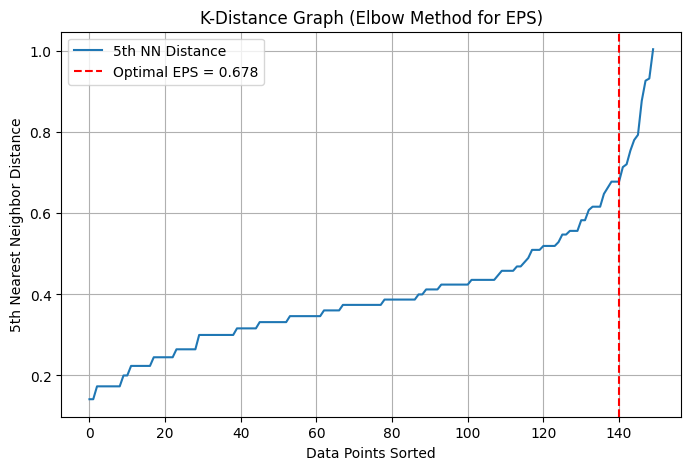

In [ ]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Compute k-nearest neighbors (k=5 is a good default)
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(iris_data.data)
distances, indices = neigh.kneighbors(iris_data.data)

# Sort the distances to find the elbow point
sorted_distances = np.sort(distances[:, -1])

# Find the optimal eps value using KneeLocator
knee = KneeLocator(range(len(sorted_distances)), sorted_distances, curve="convex", direction="increasing")

# The best eps value (y-value at the knee)
optimal_eps = sorted_distances[knee.knee]

print(f"Optimal EPS value: {optimal_eps:.3f}")

# Plot with the knee marked
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, label="5th NN Distance")
plt.axvline(knee.knee, color="r", linestyle="--", label=f"Optimal EPS = {optimal_eps:.3f}")
plt.xlabel("Data Points Sorted")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph (Elbow Method for EPS)")
plt.legend()
plt.grid()
plt.show()


eps: 0.31, min_samples: 5, Clusters: 4, Silhouette Score: -0.0245
eps: 0.51, min_samples: 5, Clusters: 2, Silhouette Score: 0.4996
eps: 0.51, min_samples: 10, Clusters: 2, Silhouette Score: 0.4591
eps: 0.51, min_samples: 15, Clusters: 4, Silhouette Score: 0.2657
eps: 0.72, min_samples: 5, Clusters: 2, Silhouette Score: 0.5018
eps: 0.72, min_samples: 10, Clusters: 2, Silhouette Score: 0.5346
eps: 0.72, min_samples: 15, Clusters: 2, Silhouette Score: 0.5346
eps: 0.72, min_samples: 20, Clusters: 2, Silhouette Score: 0.5315
eps: 0.72, min_samples: 25, Clusters: 2, Silhouette Score: 0.4878
eps: 0.93, min_samples: 5, Clusters: 2, Silhouette Score: 0.6867
eps: 0.93, min_samples: 10, Clusters: 2, Silhouette Score: 0.6867
eps: 0.93, min_samples: 15, Clusters: 2, Silhouette Score: 0.5283
eps: 0.93, min_samples: 20, Clusters: 2, Silhouette Score: 0.5283
eps: 0.93, min_samples: 25, Clusters: 2, Silhouette Score: 0.5283
eps: 1.14, min_samples: 5, Clusters: 2, Silhouette Score: 0.6867
eps: 1.14, min

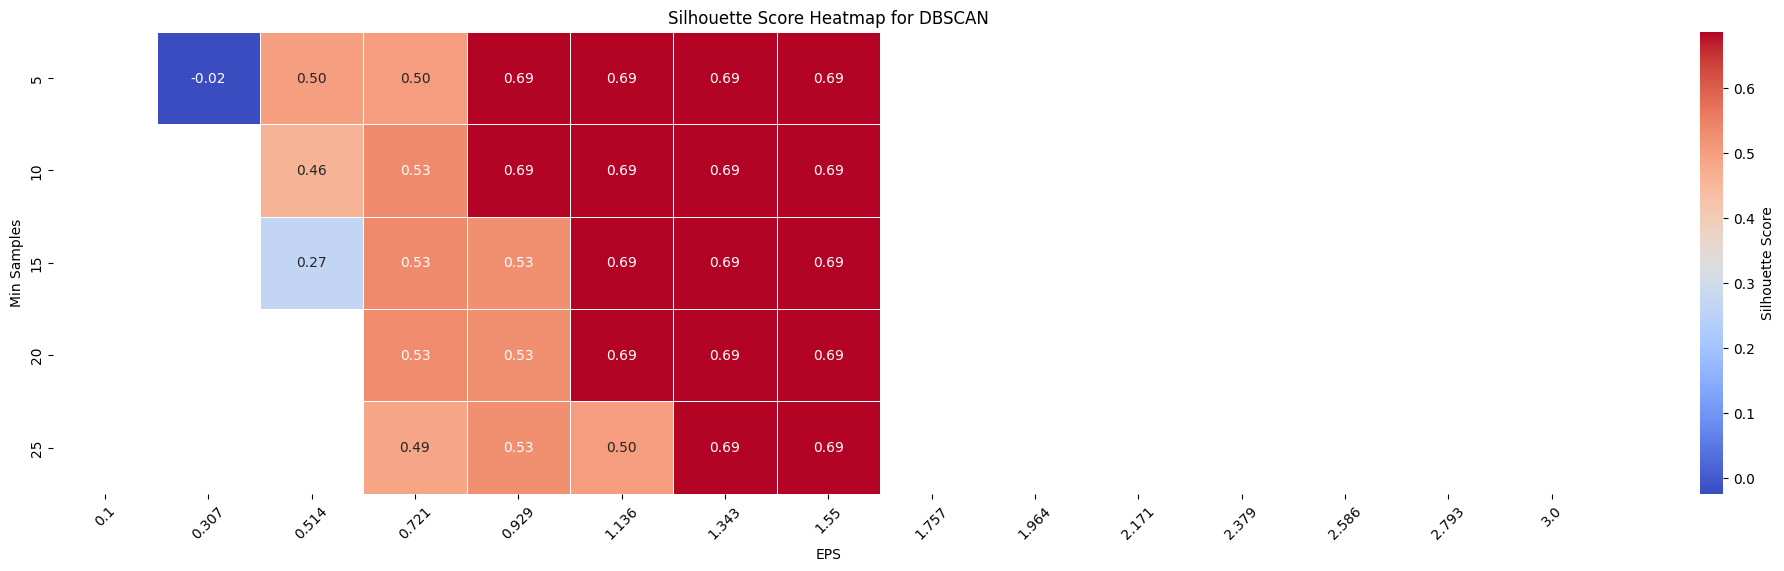


Best Parameters:
EPS: 0.929, Min Samples: 5, Clusters: 2
Best Silhouette Score: 0.6867


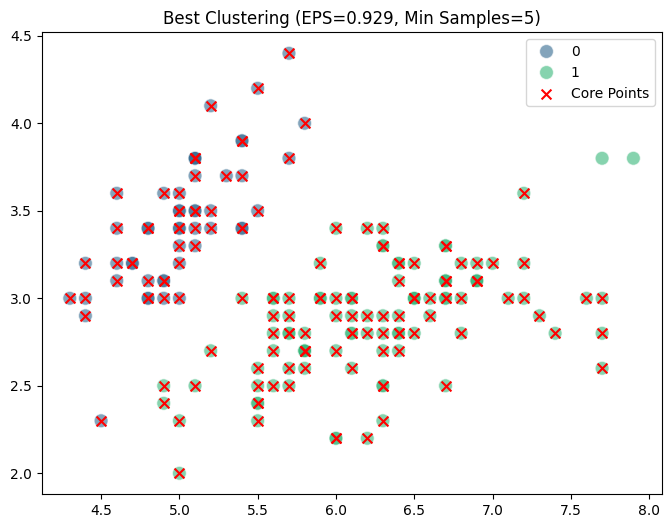

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# Define parameter ranges
eps_values = np.linspace(0.1, 3, 15)  # Reduce number of steps for clarity
min_samples_values = range(5, 30, 5)  # More range for Min Samples

# Store results
results = []
best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(iris_data.data)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(iris_data.data, labels)
        results.append((eps, min_samples, score, n_clusters))

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

        # Print each iteration's results
        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Convert results to a NumPy array
results = np.array(results, dtype=object)

# Create a pivot table for heatmap
heatmap_data = np.full((len(min_samples_values), len(eps_values)), np.nan)

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        match = results[(results[:, 0] == eps) & (results[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap_data[i, j] = match[0, 2]  # Silhouette score

# Plot the heatmap
plt.figure(figsize=(25, 6))
ax = sns.heatmap(heatmap_data, xticklabels=np.round(eps_values, 3),
                 yticklabels=min_samples_values, cmap="coolwarm", annot=True,
                 fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Silhouette Score'})

plt.xlabel("EPS")
plt.ylabel("Min Samples")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Silhouette Score Heatmap for DBSCAN")
plt.show()

# Print Best Parameters
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plot best clustering result
best_eps, best_min_samples, _ = best_params
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(iris_data.data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_data.data[:, 0], y=iris_data.data[:, 1], hue=best_labels, palette='viridis', alpha=0.6, s=100)
plt.scatter(best_model.components_[:, 0], best_model.components_[:, 1], c='red', marker='x', s=50, label='Core Points')
plt.title(f"Best Clustering (EPS={best_eps:.3f}, Min Samples={best_min_samples})")
plt.legend()
plt.show()

# DBSCAN "Iris data set" (After scaling)

Optimal EPS value: 0.722


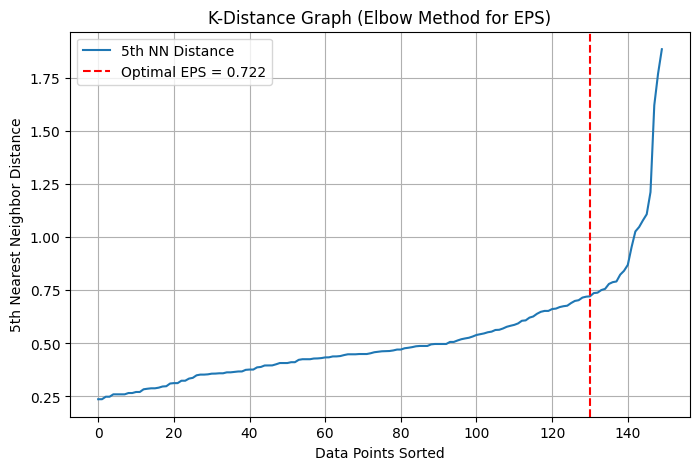

In [ ]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Compute k-nearest neighbors (k=5 is a good default)
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(scaled_iris)
distances, indices = neigh.kneighbors(scaled_iris)

# Sort the distances to find the elbow point
sorted_distances = np.sort(distances[:, -1])

# Find the optimal eps value using KneeLocator
knee = KneeLocator(range(len(sorted_distances)), sorted_distances, curve="convex", direction="increasing")

# The best eps value (y-value at the knee)
optimal_eps = sorted_distances[knee.knee]

print(f"Optimal EPS value: {optimal_eps:.3f}")

# Plot with the knee marked
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, label="5th NN Distance")
plt.axvline(knee.knee, color="r", linestyle="--", label=f"Optimal EPS = {optimal_eps:.3f}")
plt.xlabel("Data Points Sorted")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph (Elbow Method for EPS)")
plt.legend()
plt.grid()
plt.show()

eps: 0.31, min_samples: 5, Clusters: 3, Silhouette Score: -0.1942
eps: 0.51, min_samples: 5, Clusters: 2, Silhouette Score: 0.3609
eps: 0.51, min_samples: 10, Clusters: 3, Silhouette Score: 0.0497
eps: 0.72, min_samples: 5, Clusters: 2, Silhouette Score: 0.5234
eps: 0.72, min_samples: 10, Clusters: 2, Silhouette Score: 0.4229
eps: 0.72, min_samples: 15, Clusters: 2, Silhouette Score: 0.3864
eps: 0.72, min_samples: 20, Clusters: 2, Silhouette Score: 0.2279
eps: 0.93, min_samples: 5, Clusters: 2, Silhouette Score: 0.5217
eps: 0.93, min_samples: 10, Clusters: 2, Silhouette Score: 0.5108
eps: 0.93, min_samples: 15, Clusters: 2, Silhouette Score: 0.5142
eps: 0.93, min_samples: 20, Clusters: 2, Silhouette Score: 0.4459
eps: 0.93, min_samples: 25, Clusters: 2, Silhouette Score: 0.4292
eps: 1.14, min_samples: 5, Clusters: 2, Silhouette Score: 0.5518
eps: 1.14, min_samples: 10, Clusters: 2, Silhouette Score: 0.5383
eps: 1.14, min_samples: 15, Clusters: 2, Silhouette Score: 0.5485
eps: 1.14, min

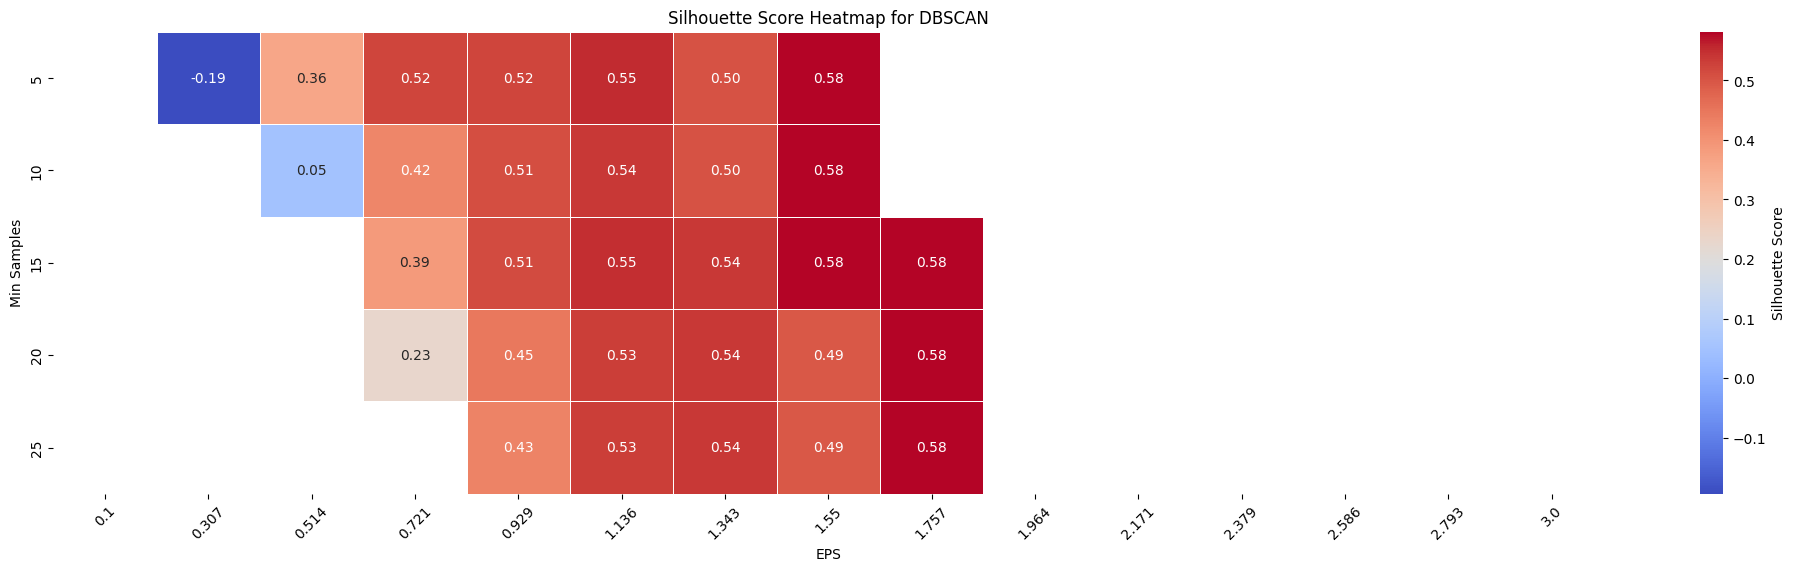


Best Parameters:
EPS: 1.550, Min Samples: 5, Clusters: 2
Best Silhouette Score: 0.5818


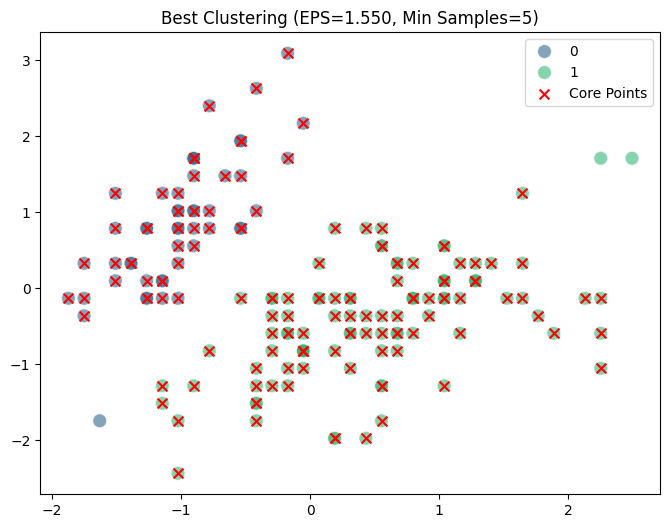

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# Define parameter ranges
eps_values = np.linspace(0.1, 3, 15)  # Reduce number of steps for clarity
min_samples_values = range(5, 30, 5)  # More range for Min Samples

# Store results
results = []
best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(scaled_iris)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(scaled_iris, labels)
        results.append((eps, min_samples, score, n_clusters))

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

        # Print each iteration's results
        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Convert results to a NumPy array
results = np.array(results, dtype=object)

# Create a pivot table for heatmap
heatmap_data = np.full((len(min_samples_values), len(eps_values)), np.nan)

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        match = results[(results[:, 0] == eps) & (results[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap_data[i, j] = match[0, 2]  # Silhouette score

# Plot the heatmap
plt.figure(figsize=(25, 6))
ax = sns.heatmap(heatmap_data, xticklabels=np.round(eps_values, 3),
                 yticklabels=min_samples_values, cmap="coolwarm", annot=True,
                 fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Silhouette Score'})

plt.xlabel("EPS")
plt.ylabel("Min Samples")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Silhouette Score Heatmap for DBSCAN")
plt.show()

# Print Best Parameters
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plot best clustering result
best_eps, best_min_samples, _ = best_params
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(scaled_iris)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_iris[:, 0], y=scaled_iris[:, 1], hue=best_labels, palette='viridis', alpha=0.6, s=100)
plt.scatter(best_model.components_[:, 0], best_model.components_[:, 1], c='red', marker='x', s=50, label='Core Points')
plt.title(f"Best Clustering (EPS={best_eps:.3f}, Min Samples={best_min_samples})")
plt.legend()
plt.show()

In [ ]:
# After scaling, DBSCAN produced a different clustering result.
# Scaling changes the relative distances between points, which affects how DBSCAN determines dense regions.
# If distances between clusters were already small before scaling, DBSCAN may merge clusters.
# If distances increased, some points that were previously part of a cluster may now be treated as noise.
#
# The silhouette score changed after scaling, indicating that the cluster quality was affected.
# Unlike K-Means and Agglomerative Clustering, DBSCAN's sensitivity to density means that scaling can have a large impact on results.


In [ ]:
# **Comparison of Clustering Algorithms**
# - **K-Means** performs best when clusters are spherical and well-separated.
# - **Agglomerative Clustering** works well with hierarchical structures and is more flexible with cluster shapes.
# - **DBSCAN** is best for irregularly shaped clusters but is sensitive to density variations.
#
# **Effect of Scaling:**
# - K-Means was significantly affected by scaling because it is distance-based.
# - Agglomerative Clustering was less affected, but scaling changed the silhouette score.
# - DBSCAN was strongly affected by scaling, as density-based clustering depends on relative distances.
#
# **Performance Evaluation:**
# - For the Iris dataset, all three clustering methods produced 2 clusters instead of 3.
# - This suggests that the dataset structure naturally leads clustering algorithms to merge Versicolor and Virginica.


# Customer dataset
Repeat all the above on the customer data set

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Customer data.csv to Customer data.csv


In [4]:
df = pd.read_csv("Customer data.csv")
#df = df.iloc[:, 1:]  # Drops the first column based on index

In [5]:
df.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

In [6]:
df = df.fillna(0)

In [7]:
df = pd.get_dummies(df)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)


In [32]:
# Convert scaled_df to a Pandas DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df= scaled_df.drop(columns=['id'], errors='ignore')
# Now you can call head()
scaled_df.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  
0              1.0  
1              1.0  
2              0.0  
3              0.5  
4              0.5

# K-means "Customer Data Set"

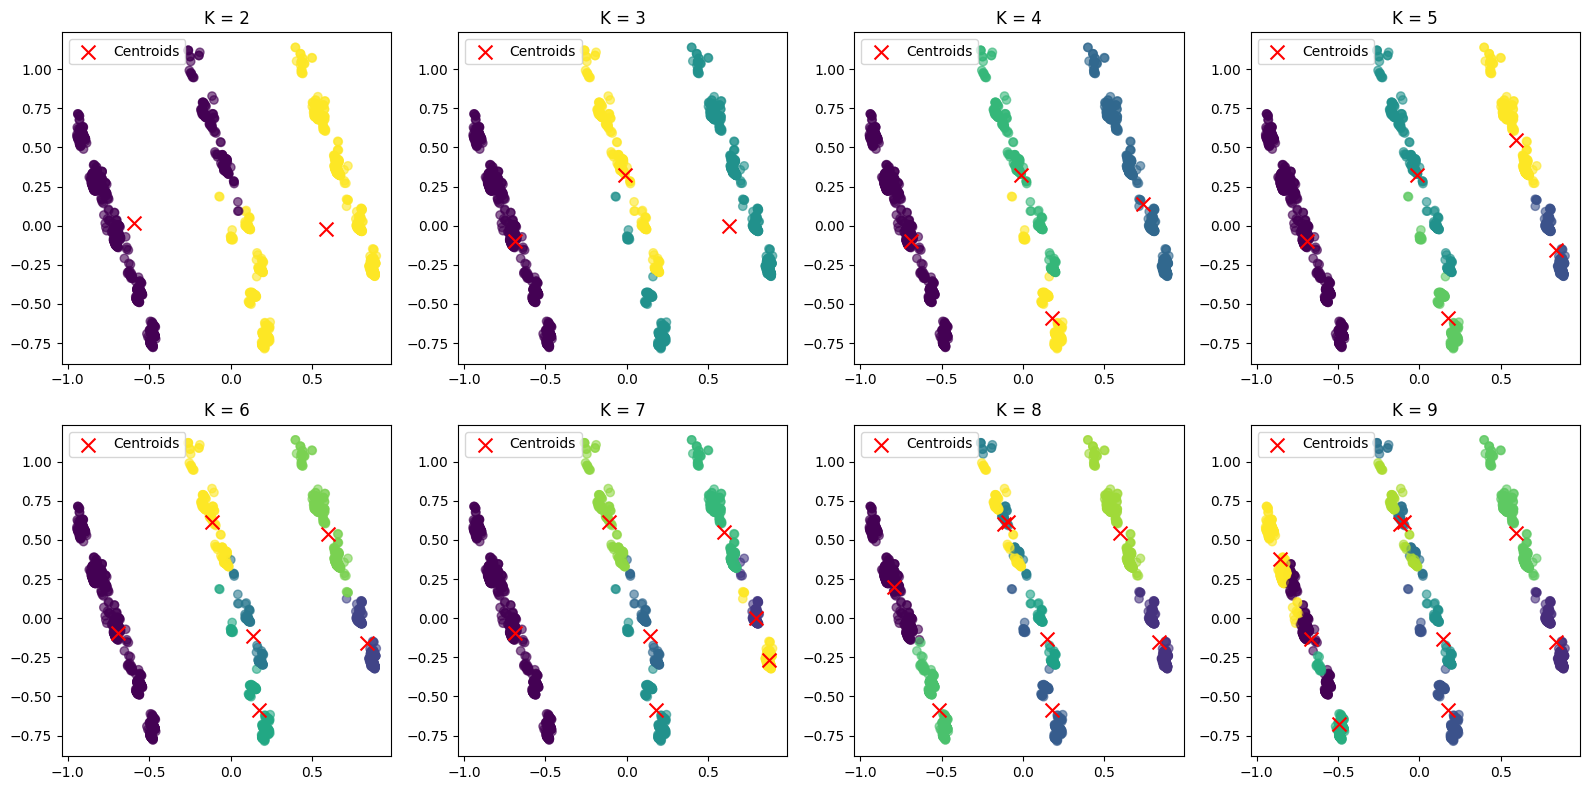

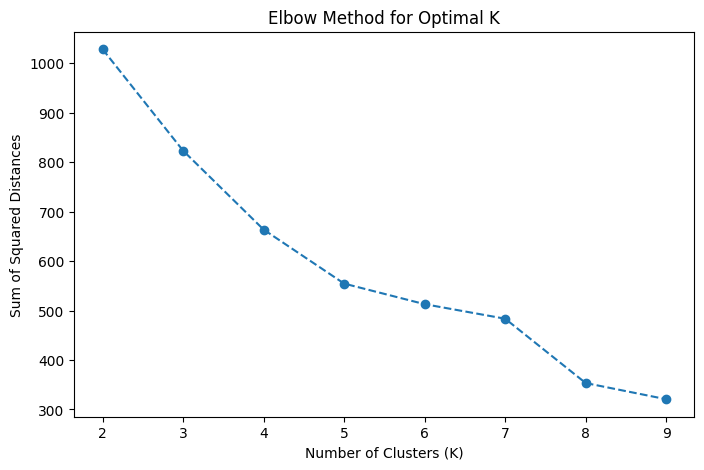

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#  PCA for Dimensionality Reduction (only for visualization)
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)

# Store SSD for elbow method
ssd = []
k_values = range(2, 10)

#  Clustering & Visualization
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(scaled_df)  # Fit on scaled data

    ssd.append(model.inertia_)  # Store sum of squared distances

    # **Project cluster centers into PCA space**
    cluster_centers_pca = pca.transform(model.cluster_centers_)

    # Plot clusters in PCA space
    ax = axes[i // 4, i % 4]
    ax.scatter(reduced_df[:, 0], reduced_df[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    ax.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, label='Centroids')
    ax.set_title(f'K = {k}')
    ax.legend()

plt.tight_layout()
plt.show()

# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, 'o--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
# There seem to be an elbow around k= 6 , but silhouette score method might give a better insight

Sil score for k=2: 0.3908
Sil score for k=3: 0.3569
Sil score for k=4: 0.4024
Sil score for k=5: 0.4225
Sil score for k=6: 0.4373
Sil score for k=7: 0.4087
Sil score for k=8: 0.4143
Sil score for k=9: 0.4096


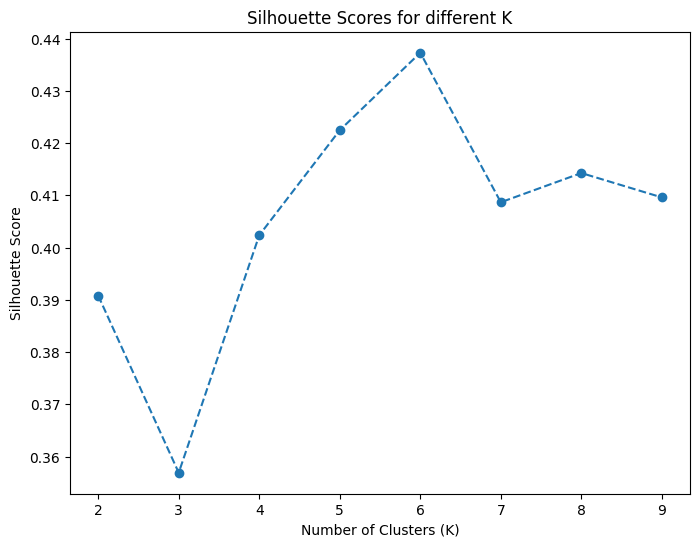

The optimal number of clusters (K) is: 6


In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K_range = range(2, 10)  # Test values of K from 2 to 10

# Step 4: Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_

    # Calculate silhouette score for the current K
    score = silhouette_score(scaled_df, labels)
    print(f"Sil score for k={k}: {score:.4f}")
    silhouette_scores.append(score)

# Step 5: Plot silhouette scores to visualize the best K
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 6: Find the optimal K (maximum silhouette score)
optimal_K = K_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (K) is: {optimal_K}")

In [ ]:
# optimum K is 6 with silhouette score = 0.4373 when k is in range (2,10)

# Hierarchal Clustering "Customer data set"

Affinity=euclidean, Linkage=ward, Distance Threshold=8 -> Clusters=9, Silhouette Score=0.3860


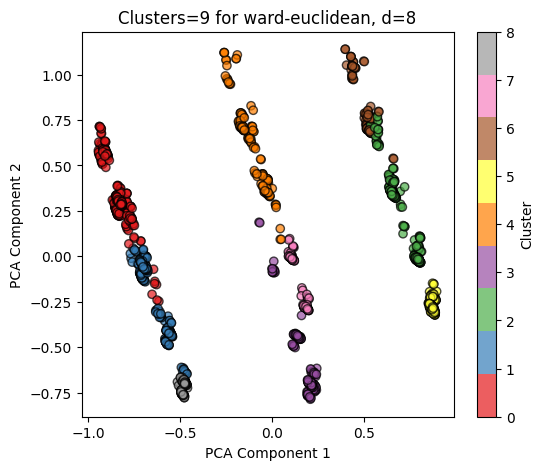

Affinity=euclidean, Linkage=ward, Distance Threshold=10 -> Clusters=7, Silhouette Score=0.3910


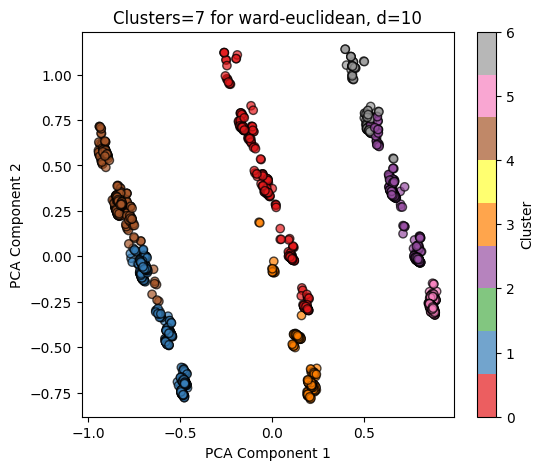

Affinity=euclidean, Linkage=ward, Distance Threshold=15 -> Clusters=5, Silhouette Score=0.3993


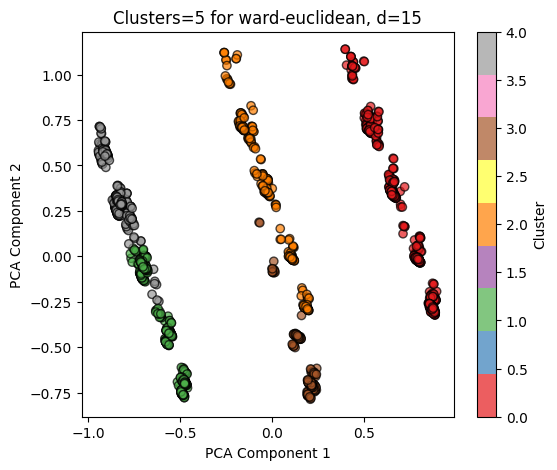

Affinity=euclidean, Linkage=ward, Distance Threshold=30 -> Clusters=2, Silhouette Score=0.3908


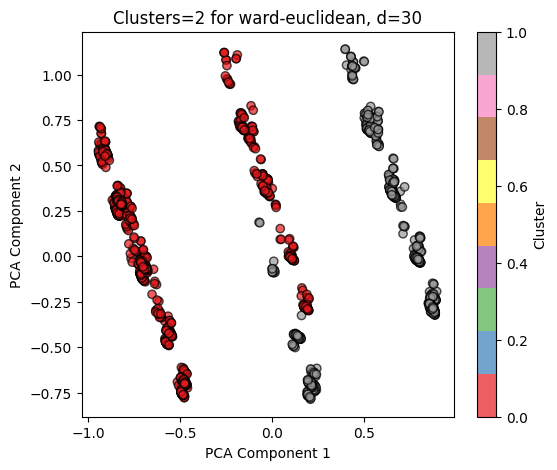


Best Agglomerative Clustering configuration:
{'affinity': 'euclidean', 'linkage': 'ward', 'distance_threshold': 15, 'silhouette_score': 0.3993256088563368, 'num_clusters': 5}


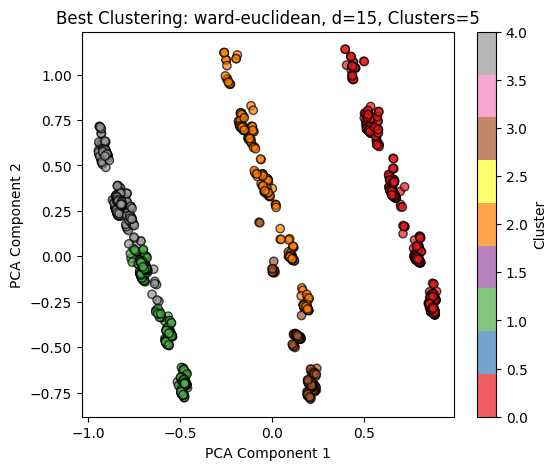

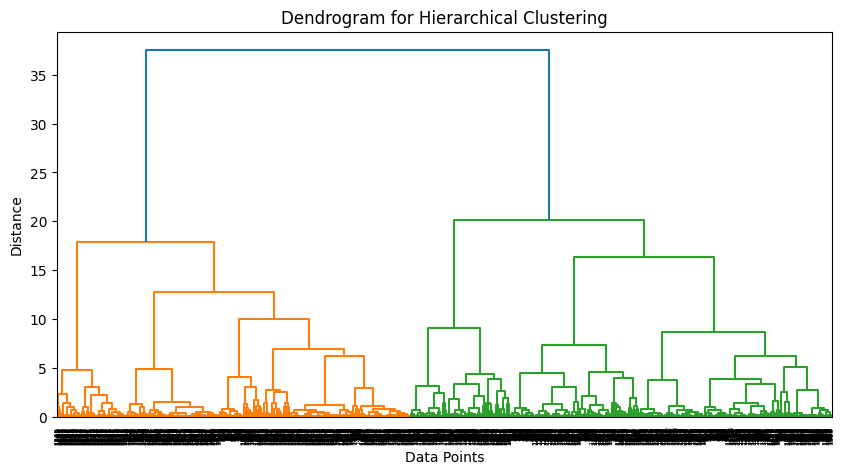

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

linkage_list = ["average", "single", "complete", "ward"]
affinity_list = ["euclidean", "manhattan", "cosine"]
distance_thresholds = [8, 10, 15, 30 ]  # Try different distance thresholds

best_silhouette = -1
best_params = {}

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)  # Project data into 2D

# Loop over different clustering configurations
for affinity in affinity_list:
    for linkage in linkage_list:
        for distance_threshold in distance_thresholds:
            # Skip invalid combinations (ward only works with euclidean)
            if linkage == "ward" and affinity != "euclidean":
                continue

            # Create the model
            model = AgglomerativeClustering(n_clusters= None,
                                            metric=affinity,
                                            linkage=linkage,
                                            distance_threshold=distance_threshold,
                                            compute_full_tree=True)

            labels = model.fit_predict(scaled_df)
            n_clusters = len(set(labels))  # Count number of unique clusters

            # Ensure the model created more than 1 cluster before evaluating silhouette score
            if n_clusters > 1:
                silhouette = silhouette_score(scaled_df, labels)
                print(f"Affinity={affinity}, Linkage={linkage}, Distance Threshold={distance_threshold} -> "
                      f"Clusters={n_clusters}, Silhouette Score={silhouette:.4f}")

                # Save best model parameters
                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_params = {
                        "affinity": affinity,
                        "linkage": linkage,
                        "distance_threshold": distance_threshold,
                        "silhouette_score": silhouette,
                        "num_clusters": n_clusters
                    }
                    best_labels = labels  # Store labels for the best clustering

                # Plot clustering result for each trial using PCA-reduced data
                plt.figure(figsize=(6, 5))
                plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=labels, cmap='Set1', edgecolors='k', alpha=0.7)
                plt.title(f"Clusters={n_clusters} for {linkage}-{affinity}, d={distance_threshold}")
                plt.xlabel("PCA Component 1")
                plt.ylabel("PCA Component 2")
                plt.colorbar(label="Cluster")
                plt.show()

# Print the best configuration
print("\nBest Agglomerative Clustering configuration:")
print(best_params)

# Plot the best clustering result using PCA-reduced data
plt.figure(figsize=(6, 5))
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=best_labels, cmap='Set1', edgecolors='k', alpha=0.7)
plt.title(f"Best Clustering: {best_params['linkage']}-{best_params['affinity']}, d={best_params['distance_threshold']}, Clusters={best_params['num_clusters']}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# --- Plot a Dendrogram for a single trial ---
plt.figure(figsize=(10, 5))
linked = sch.linkage(scaled_df, method="ward")  # Use "ward" for a clear dendrogram
sch.dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



# DBSCAN "customer data set"


Optimal EPS value: 0.501


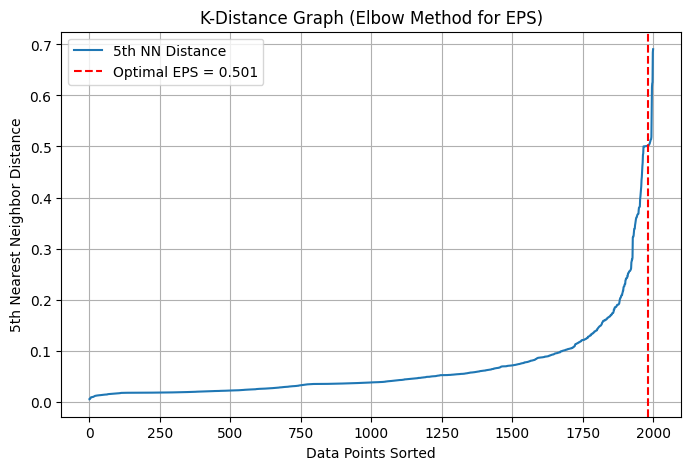

In [41]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Compute k-nearest neighbors (k=5 is a good default)
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(scaled_df)
distances, indices = neigh.kneighbors(scaled_df)

# Sort the distances to find the elbow point
sorted_distances = np.sort(distances[:, -1])

# Find the optimal eps value using KneeLocator
knee = KneeLocator(range(len(sorted_distances)), sorted_distances, curve="convex", direction="increasing")

# The best eps value (y-value at the knee)
optimal_eps = sorted_distances[knee.knee]

print(f"Optimal EPS value: {optimal_eps:.3f}")

# Plot with the knee marked
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, label="5th NN Distance")
plt.axvline(knee.knee, color="r", linestyle="--", label=f"Optimal EPS = {optimal_eps:.3f}")
plt.xlabel("Data Points Sorted")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph (Elbow Method for EPS)")
plt.legend()
plt.grid()
plt.show()

eps: 0.10, min_samples: 5, Clusters: 48, Silhouette Score: 0.5210
eps: 0.10, min_samples: 10, Clusters: 28, Silhouette Score: 0.3988
eps: 0.10, min_samples: 15, Clusters: 22, Silhouette Score: 0.3612
eps: 0.10, min_samples: 20, Clusters: 19, Silhouette Score: 0.2662
eps: 0.10, min_samples: 25, Clusters: 16, Silhouette Score: 0.1997
eps: 0.31, min_samples: 5, Clusters: 53, Silhouette Score: 0.6184
eps: 0.31, min_samples: 10, Clusters: 37, Silhouette Score: 0.5552
eps: 0.31, min_samples: 15, Clusters: 31, Silhouette Score: 0.5130
eps: 0.31, min_samples: 20, Clusters: 24, Silhouette Score: 0.4513
eps: 0.31, min_samples: 25, Clusters: 22, Silhouette Score: 0.4275
eps: 0.51, min_samples: 5, Clusters: 4, Silhouette Score: 0.3982
eps: 0.51, min_samples: 10, Clusters: 4, Silhouette Score: 0.3982
eps: 0.51, min_samples: 15, Clusters: 4, Silhouette Score: 0.3972
eps: 0.51, min_samples: 20, Clusters: 4, Silhouette Score: 0.3913
eps: 0.51, min_samples: 25, Clusters: 4, Silhouette Score: 0.3925
eps

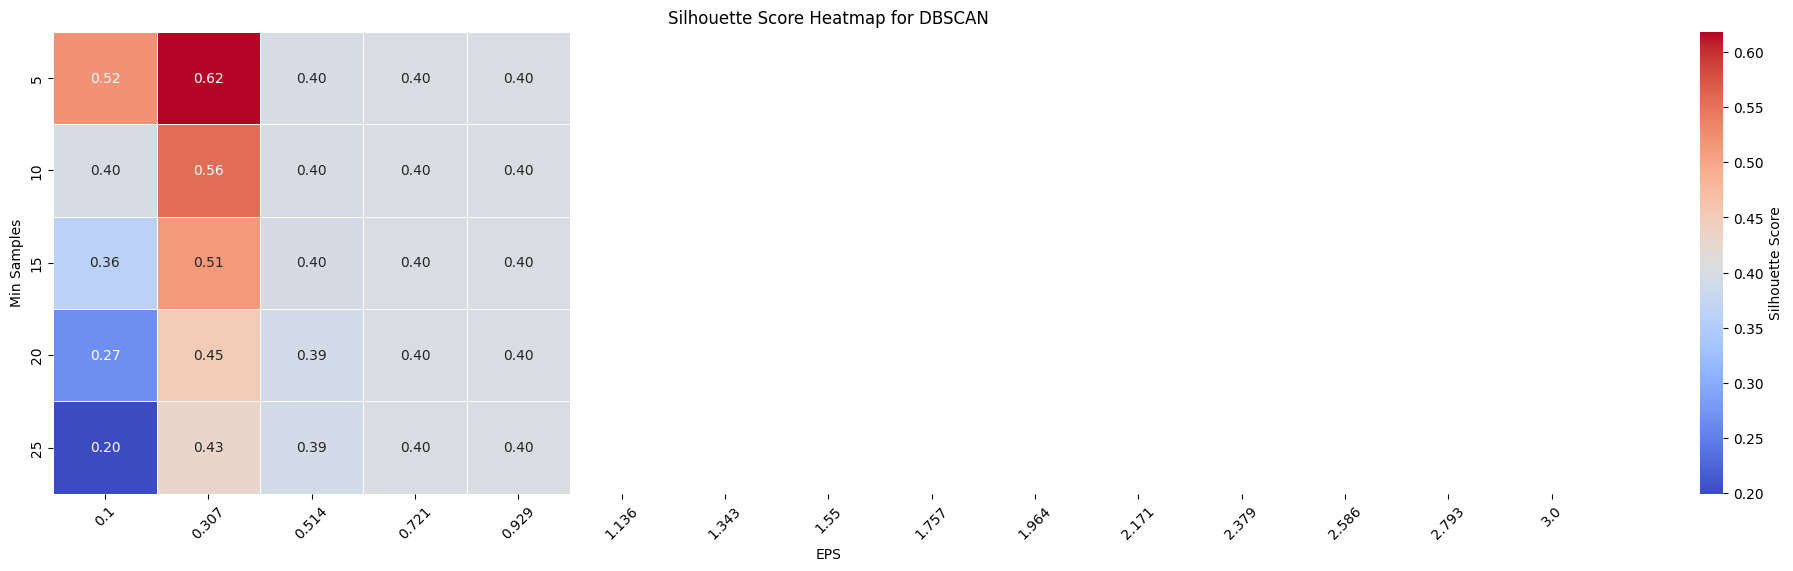


Best Parameters:
EPS: 0.307, Min Samples: 5, Clusters: 53
Best Silhouette Score: 0.6184


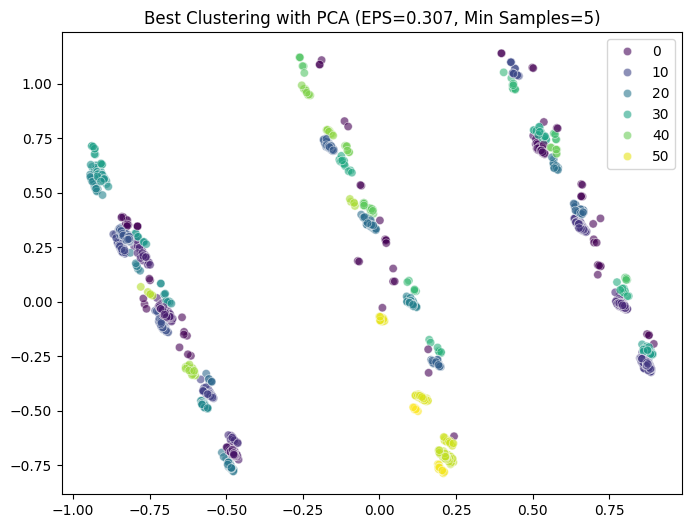

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
from sklearn.decomposition import PCA

# Define parameter ranges
eps_values = np.linspace(0.1, 3, 15)  # Reduce number of steps for clarity
min_samples_values = range(5, 30, 5)  # More range for Min Samples

# Store results
results = []
best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(scaled_df)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(scaled_df, labels)
        results.append((eps, min_samples, score, n_clusters))

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

        # Print each iteration's results
        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Convert results to a NumPy array
results = np.array(results, dtype=object)

# Create a pivot table for heatmap
heatmap_data = np.full((len(min_samples_values), len(eps_values)), np.nan)

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        match = results[(results[:, 0] == eps) & (results[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap_data[i, j] = match[0, 2]  # Silhouette score

# Plot the heatmap
plt.figure(figsize=(25, 6))
ax = sns.heatmap(heatmap_data, xticklabels=np.round(eps_values, 3),
                 yticklabels=min_samples_values, cmap="coolwarm", annot=True,
                 fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Silhouette Score'})

plt.xlabel("EPS")
plt.ylabel("Min Samples")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Silhouette Score Heatmap for DBSCAN")
plt.show()

# Print Best Parameters
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plot best clustering result
best_eps, best_min_samples, _ = best_params
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(scaled_df)

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=best_labels, palette='viridis', alpha=0.6)
plt.title(f"Best Clustering with PCA (EPS={best_eps:.3f}, Min Samples={best_min_samples})")
plt.legend()
plt.show()


In [ ]:
# A problem arrises with DBSCAN, huge number of clusters "Overfitting"
# so we will tweek some parameters "eps range, min samples range amd limiting the number of clusters to a reasonable value"
# we will test way more cases, in hopes to find another case with sensible number of clusters, and a close silhouette score

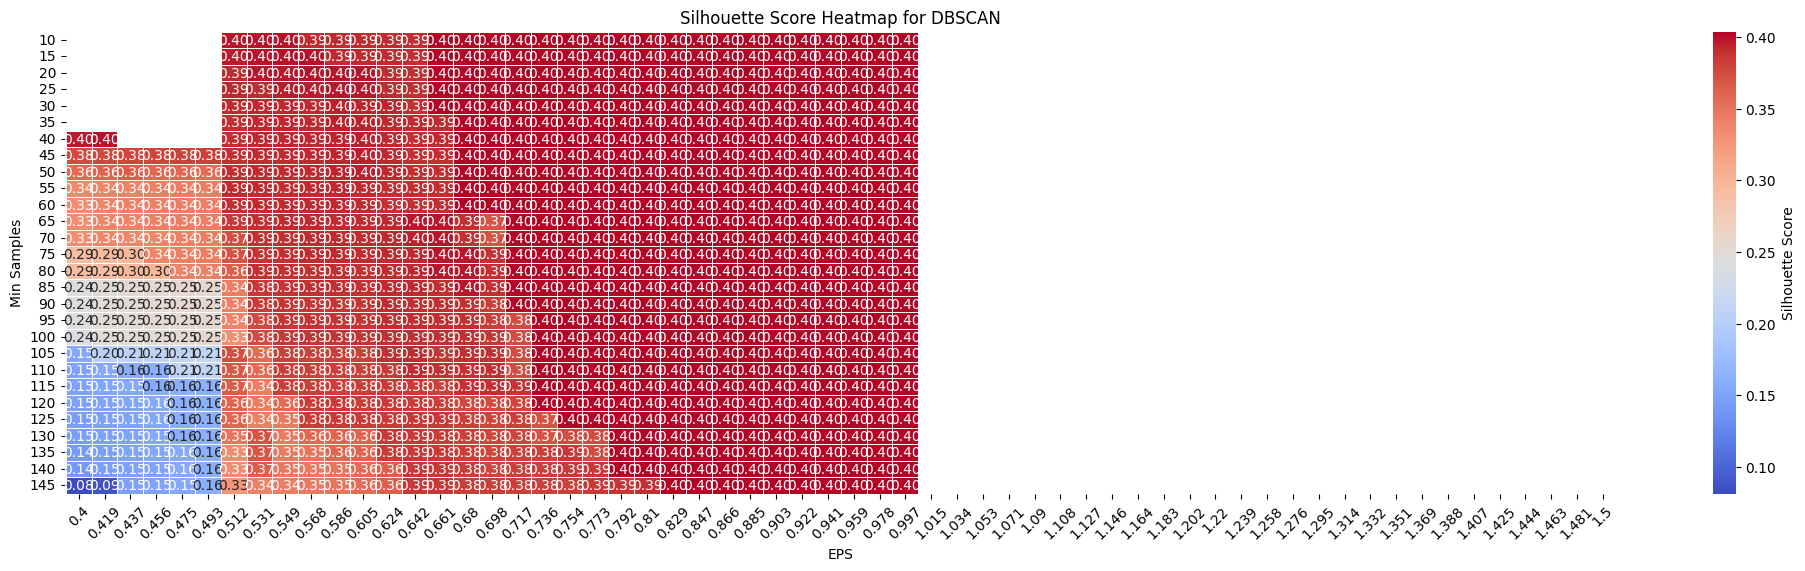


Best Parameters:
EPS: 0.661, Min Samples: 10, Clusters: 4
Best Silhouette Score: 0.4036


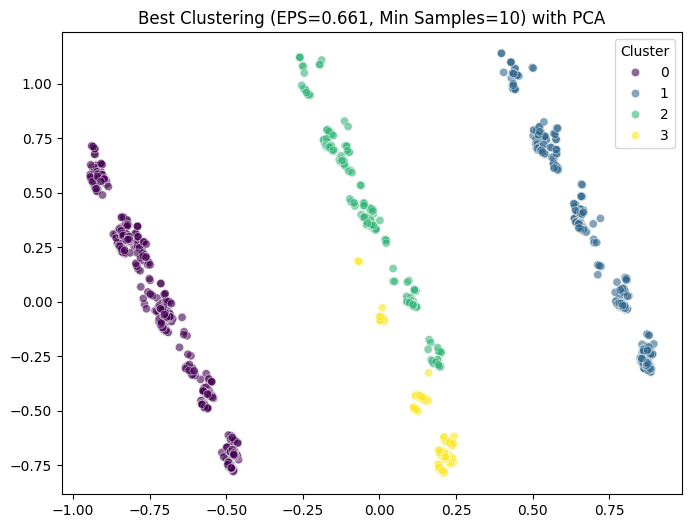

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from itertools import product

# Define parameter ranges
eps_values = np.linspace(0.4, 1.5, 60)  # Reduce number of steps for clarity
min_samples_values = range(10, 150, 5)  # More range for Min Samples

# Store results
results = []
best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(scaled_df)

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster, no clusters, or too many clusters
    if 1 < n_clusters <= 15:
        score = silhouette_score(scaled_df, labels)
        results.append((eps, min_samples, score, n_clusters))

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

        # Print each iteration's results
      #  print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Convert results to a NumPy array
results = np.array(results, dtype=object)

# Create a pivot table for heatmap
heatmap_data = np.full((len(min_samples_values), len(eps_values)), np.nan)

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        match = results[(results[:, 0] == eps) & (results[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap_data[i, j] = match[0, 2]  # Silhouette score

# Plot the heatmap
plt.figure(figsize=(25, 6))
ax = sns.heatmap(heatmap_data, xticklabels=np.round(eps_values, 3),
                 yticklabels=min_samples_values, cmap="coolwarm", annot=True,
                 fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Silhouette Score'})

plt.xlabel("EPS")
plt.ylabel("Min Samples")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Silhouette Score Heatmap for DBSCAN")
plt.show()

# Print Best Parameters
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plot best clustering result with PCA
best_eps, best_min_samples, _ = best_params
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(scaled_df)

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=best_labels, palette='viridis', alpha=0.6)
plt.title(f"Best Clustering (EPS={best_eps:.3f}, Min Samples={best_min_samples}) with PCA")
plt.legend(title='Cluster')
plt.show()


In [ ]:
'''
For the customer data set, each algorithms yeilded a different number of clusters, yet not too different
The K-means algorithm yeilded 6 clusters with silhouette score = 0.4373 when k is in range (2,10), which is the best silhouette score for this data set

The hierarichal clustering yeilded 5 clusters with silhouette score = 0.3993 with parameters :
{'affinity': 'euclidean', 'linkage': 'ward', 'distance_threshold': 15, 'silhouette_score': 0.3993256088563368, 'num_clusters': 5}

DBSCAN yeilded silhouette score of 0.4036 for 4 clusters with EPS: 0.661 (which is not very far from the k-distance graph), Min Samples: 10
'''